<a href="https://colab.research.google.com/github/thuhuong205201/Credit-Card-Default/blob/main/kmeansmote_before_train_test_split.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Initializing**

In [ ]:
#importing required libraries for data analysis
import pandas as pd
import numpy as np
from numpy import math

#importing libraries for data visualization
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [ ]:
pip install xlrd

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df = pd.read_csv('/content/drive/MyDrive/1/UCI_Credit_Card.csv')

In [ ]:
#take a first of dataset
df.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
0,1,20000.0,2,2,1,24,2,2,-1,-1,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,2,120000.0,2,2,2,26,-1,2,0,0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,3,90000.0,2,2,2,34,0,0,0,0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,4,50000.0,2,2,1,37,0,0,0,0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,5,50000.0,1,2,1,57,-1,0,-1,0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0


# **Data Cleaning**

In [ ]:
#shape of data
df.shape

(30000, 25)

In [ ]:
#basic information of datset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   ID                          30000 non-null  int64  
 1   LIMIT_BAL                   30000 non-null  float64
 2   SEX                         30000 non-null  int64  
 3   EDUCATION                   30000 non-null  int64  
 4   MARRIAGE                    30000 non-null  int64  
 5   AGE                         30000 non-null  int64  
 6   PAY_0                       30000 non-null  int64  
 7   PAY_2                       30000 non-null  int64  
 8   PAY_3                       30000 non-null  int64  
 9   PAY_4                       30000 non-null  int64  
 10  PAY_5                       30000 non-null  int64  
 11  PAY_6                       30000 non-null  int64  
 12  BILL_AMT1                   30000 non-null  float64
 13  BILL_AMT2                   300

In [ ]:
#summary of dataset
df.describe(include='all').T

,count,mean,std,min,25%,50%,75%,max
ID,30000.0,15000.500000,8660.398374,1.0,7500.75,15000.5,22500.25,30000.0
LIMIT_BAL,30000.0,167484.322667,129747.661567,10000.0,50000.00,140000.0,240000.00,1000000.0
SEX,30000.0,1.603733,0.489129,1.0,1.00,2.0,2.00,2.0
EDUCATION,30000.0,1.853133,0.790349,0.0,1.00,2.0,2.00,6.0
MARRIAGE,30000.0,1.551867,0.521970,0.0,1.00,2.0,2.00,3.0
AGE,30000.0,35.485500,9.217904,21.0,28.00,34.0,41.00,79.0
PAY_0,30000.0,-0.016700,1.123802,-2.0,-1.00,0.0,0.00,8.0
PAY_2,30000.0,-0.133767,1.197186,-2.0,-1.00,0.0,0.00,8.0
PAY_3,30000.0,-0.166200,1.196868,-2.0,-1.00,0.0,0.00,8.0
PAY_4,30000.0,-0.220667,1.169139,-2.0,-1.00,0.0,0.00,8.0


EDUCATION: not values 5,6,0

MARRIAGE: not values 0

Pay_0->6: not values -2

<Axes: >

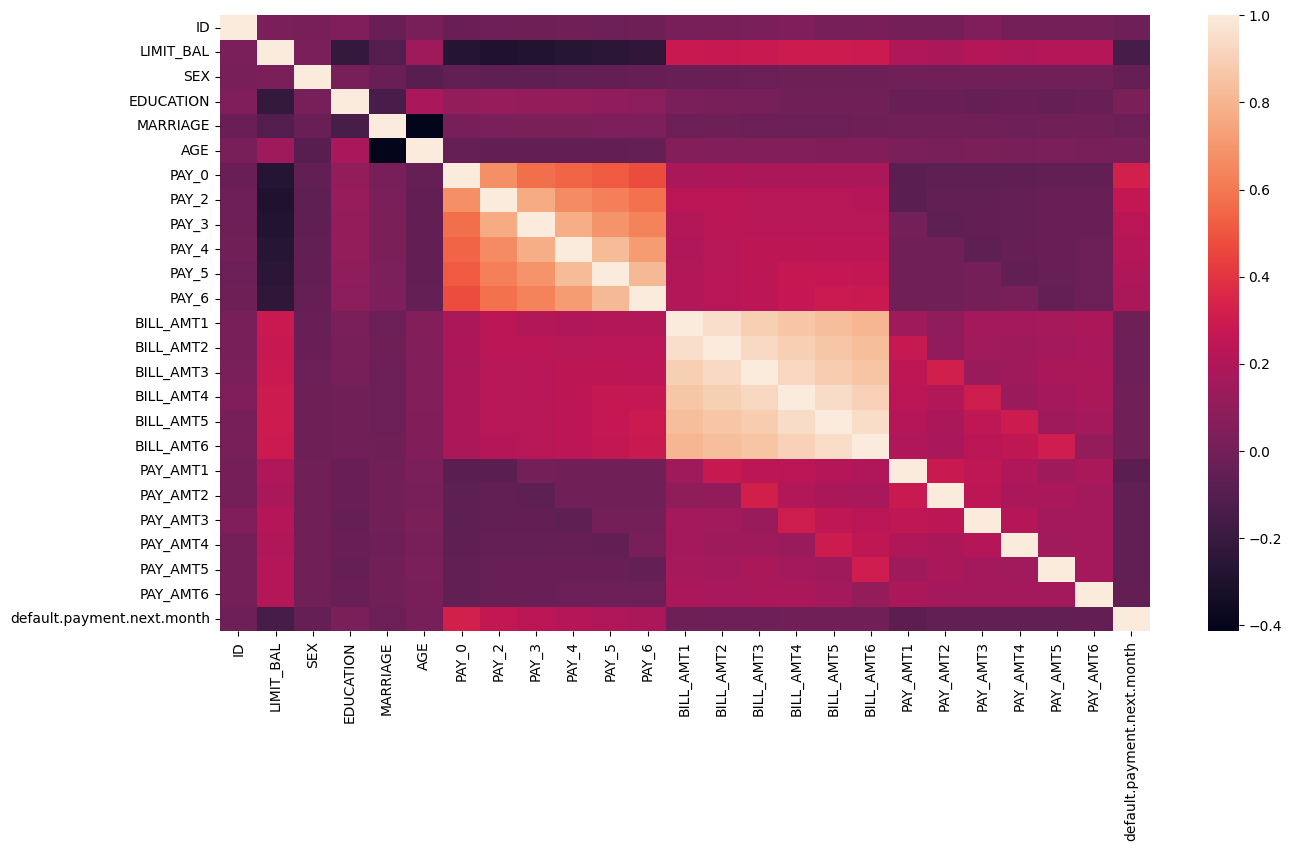

In [ ]:
plt.figure(figsize = (15, 8))
sns.heatmap(df.corr())

In [ ]:
#check for na values in dataset
df.isna().sum().sum()

0

In [ ]:
#check for null values in dataset
df.isnull().sum().sum()

0

In [ ]:
#check for any duplicates
len(df[df.duplicated()])

0

- Dataset dose not contains any NA values, null values and duplicates.

# <b> Data Description </b>



In [ ]:
#columns of dataset
df.columns

Index(['ID', 'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0',
       'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6',
       'default.payment.next.month'],
      dtype='object')

In [ ]:
#shape of dataset
df.shape

(30000, 25)


### This research employed a binary variable, default payment (Yes = 1, No = 0), as the response variable. This study reviewed the literature and used the following variables as explanatory variables:
* **ID**: Unique ID of each client
* **LIMIT_BAL**: Amount of the given credit (NT dollar): it includes both the individual consumer credit and his/her family (supplementary) credit.
* **Gender**: 1 = male; 2 = female
* **Education**: 1 = graduate school; 2 = university; 3 = high school; 4 = others
* **Marital status**: 1 = married; 2 = single; 3 = others).
* **Age**: Age in years

 ## **History of past payment.**

### We tracked the past monthly payment records from April to September, 2005.The measurement scale for the repayment status is: -1 = pay duly; 1 = payment delay for one month; 2 = payment delay for two months; . . .; 8 = payment delay for eight months; 9 = payment delay for nine months and above.
* **PAY_0**: Repayment status in September, 2005

* **PAY_2**: Repayment status in August, 2005

* **PAY_3**: Repayment status in July, 2005

* **PAY_4**: Repayment status in June, 2005

* **PAY_5**: Repayment status in May, 2005

* **PAY_6**: Repayment status in April, 2005


## **Amount of bill statement (NT dollar).**

* **BILL_AMT1**: Amount of bill statement in September, 2005

* **BILL_AMT2**: Amount of bill statement in August, 2005

* **BILL_AMT3:** Amount of bill statement in July, 2005
* **BILL_AMT4**: Amount of bill statement in June, 2005

* **BILL_AMT5**: Amount of bill statement in May, 2005

* **BILL_AMT6**: Amount of bill statement in April, 2005

## **Amount of previous payment (NT dollar).**

* **PAY_AMT1**: Amount of previous payment in September, 2005

* **PAY_AMT2**: Amount of previous payment in August, 2005

* **PAY_AMT3**: Amount of previous payment in July, 2005
* **PAY_AMT4**: Amount of previous payment in June, 2005
* **PAY_AMT5**: Amount of previous payment in May, 2005

* **PAY_AMT6**: Amount of previous payment in April, 2005

* **default.payment.next.month**: Default payment (1=yes, 0=no)

# **Data Preprocessing**

**Changing name of some columns for simplicity and better understanding**

In [ ]:
# 478,935

In [ ]:
fil = (df.PAY_0 == -2) | (df.PAY_0 == -1) | (df.PAY_0 == 0)
df.loc[fil, 'PAY_0'] = 0
fil = (df.PAY_2 == -2) | (df.PAY_2 == -1) | (df.PAY_2 == 0)
df.loc[fil, 'PAY_2'] = 0
fil = (df.PAY_3 == -2) | (df.PAY_3 == -1) | (df.PAY_3 == 0)
df.loc[fil, 'PAY_3'] = 0
fil = (df.PAY_4 == -2) | (df.PAY_4 == -1) | (df.PAY_4 == 0)
df.loc[fil, 'PAY_4'] = 0
fil = (df.PAY_5 == -2) | (df.PAY_5 == -1) | (df.PAY_5 == 0)
df.loc[fil, 'PAY_5'] = 0
fil = (df.PAY_6 == -2) | (df.PAY_6 == -1) | (df.PAY_6 == 0)
df.loc[fil, 'PAY_6'] = 0
late = df[['PAY_0','PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6']]
# draw_histograms(late, late.columns, 2, 3, 10)

There are a few problems here, pay is the repayment status and according to the initial dataset the minimum value should be -1. As we can see here, they all have the undocumented label -2. Also, if 1,2,3,etc are delayed months then 0 should be labeled as "valid payment". Therefore, any negative value will be treated as 0.

In [ ]:
#renaming of columns
df.rename(columns={'default.payment.next.month' : 'IsDefaulter'}, inplace=True)
df.rename(columns={'PAY_0':'PAY_SEPT','PAY_2':'PAY_AUG','PAY_3':'PAY_JUL','PAY_4':'PAY_JUN','PAY_5':'PAY_MAY','PAY_6':'PAY_APR'},inplace=True)
df.rename(columns={'BILL_AMT1':'BILL_AMT_SEPT','BILL_AMT2':'BILL_AMT_AUG','BILL_AMT3':'BILL_AMT_JUL','BILL_AMT4':'BILL_AMT_JUN','BILL_AMT5':'BILL_AMT_MAY','BILL_AMT6':'BILL_AMT_APR'}, inplace = True)
df.rename(columns={'PAY_AMT1':'PAY_AMT_SEPT','PAY_AMT2':'PAY_AMT_AUG','PAY_AMT3':'PAY_AMT_JUL','PAY_AMT4':'PAY_AMT_JUN','PAY_AMT5':'PAY_AMT_MAY','PAY_AMT6':'PAY_AMT_APR'},inplace=True)


In [ ]:
#check for columns name
df.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_SEPT,PAY_AUG,PAY_JUL,PAY_JUN,...,BILL_AMT_JUN,BILL_AMT_MAY,BILL_AMT_APR,PAY_AMT_SEPT,PAY_AMT_AUG,PAY_AMT_JUL,PAY_AMT_JUN,PAY_AMT_MAY,PAY_AMT_APR,IsDefaulter
0,1,20000.0,2,2,1,24,2,2,0,0,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,2,120000.0,2,2,2,26,0,2,0,0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,3,90000.0,2,2,2,34,0,0,0,0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,4,50000.0,2,2,1,37,0,0,0,0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,5,50000.0,1,2,1,57,0,0,0,0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0


In [ ]:
# #replacing values with there labels for EDA
# df.replace({'SEX': {1 : 'Male', 2 : 'Female'}}, inplace=True)
# df.replace({'EDUCATION' : {1 : 'Graduate School', 2 : 'University', 3 : 'High School', 4 : 'Others'}}, inplace=True)
# df.replace({'MARRIAGE' : {1 : 'Married', 2 : 'Single', 3 : 'Others'}}, inplace = True)
# df.replace({'IsDefaulter' : {1 : 'Yes', 0 : 'No'}}, inplace = True)

In [ ]:
#check for replaced labels
df.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_SEPT,PAY_AUG,PAY_JUL,PAY_JUN,...,BILL_AMT_JUN,BILL_AMT_MAY,BILL_AMT_APR,PAY_AMT_SEPT,PAY_AMT_AUG,PAY_AMT_JUL,PAY_AMT_JUN,PAY_AMT_MAY,PAY_AMT_APR,IsDefaulter
0,1,20000.0,2,2,1,24,2,2,0,0,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,2,120000.0,2,2,2,26,0,2,0,0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,3,90000.0,2,2,2,34,0,0,0,0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,4,50000.0,2,2,1,37,0,0,0,0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,5,50000.0,1,2,1,57,0,0,0,0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0


In [ ]:
#replcae values with 5, 6 and 0 to Others
df.EDUCATION = df.EDUCATION.replace({5: 4, 6: 4,0: 4})

In [ ]:
#replace 0 with Others
df.MARRIAGE = df.MARRIAGE.replace({0: 3})

In [ ]:
def assign_group(age):
    if age >= 18 and age <= 24:
        return 0
    elif age >= 25 and age <= 34:
        return 1
    elif age >= 35 and age <= 44:
        return 2
    else:
        return 3

df['AGE_group'] = df['AGE'].apply(assign_group)
df.drop('AGE',axis = 1, inplace = True)
df.head()
# group_age(for i in dfx.AGE)

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,PAY_SEPT,PAY_AUG,PAY_JUL,PAY_JUN,PAY_MAY,...,BILL_AMT_MAY,BILL_AMT_APR,PAY_AMT_SEPT,PAY_AMT_AUG,PAY_AMT_JUL,PAY_AMT_JUN,PAY_AMT_MAY,PAY_AMT_APR,IsDefaulter,AGE_group
0,1,20000.0,2,2,1,2,2,0,0,0,...,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1,0
1,2,120000.0,2,2,2,0,2,0,0,0,...,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1,1
2,3,90000.0,2,2,2,0,0,0,0,0,...,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0,1
3,4,50000.0,2,2,1,0,0,0,0,0,...,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0,2
4,5,50000.0,1,2,1,0,0,0,0,0,...,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0,3


# **Exploratory Data Analysis - Don't run**




## **Clean data**




## **IsDefaulter**

<Axes: xlabel='IsDefaulter', ylabel='count'>

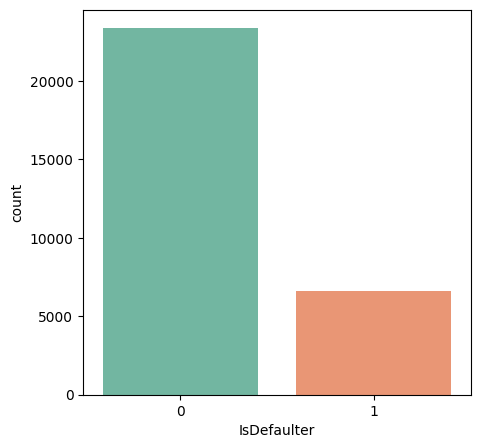

In [ ]:
#values count plot of IsDefaulter
plt.figure(figsize=(5,5))
sns.countplot(x = 'IsDefaulter', data = df, palette='Set2')

- Both classes are not in proportion that is we have imbalanced dataset.

<Axes: xlabel='SEX', ylabel='count'>

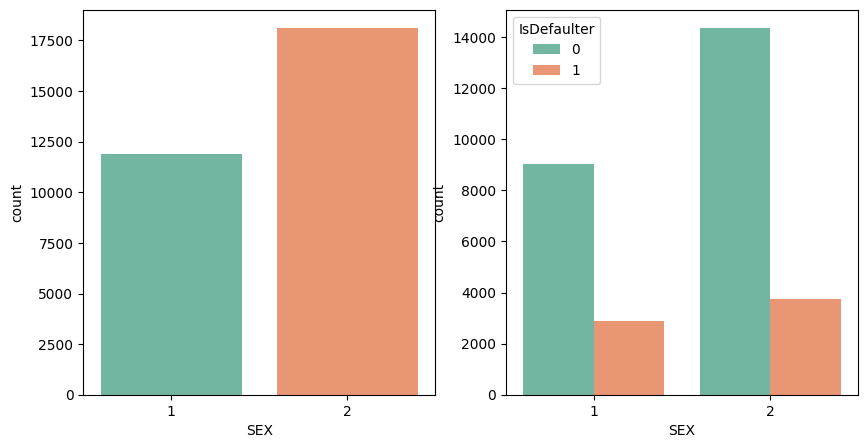

In [ ]:
#count plot for Sex and with respect to IsDefaulter
fig, axes = plt.subplots(ncols=2,figsize=(10,5))
sns.countplot(x = 'SEX', ax = axes[0], data = df, palette='Set2')
sns.countplot(x = 'SEX', hue = 'IsDefaulter',ax = axes[1], data = df, palette='Set2')

## **EDUCATION**

In [ ]:
#category wise values
df['EDUCATION'].value_counts()

2    14030
1    10585
3     4917
4      468
Name: EDUCATION, dtype: int64

- In education column, values such as 5,6 and 0 are unknown. Lets combine those values as others.

In [ ]:
#replcae values with 5, 6 and 0 to Others
df.EDUCATION = df.EDUCATION.replace({5: 4, 6: 4,0: 4})

## **MARRIAGE**

In [ ]:
#category wise values
df['MARRIAGE'].value_counts()

2    15964
1    13659
3      377
Name: MARRIAGE, dtype: int64

- In marriage column, 0 values are not known. Combine those values in others category.

In [ ]:
#replace 0 with Others
df.MARRIAGE = df.MARRIAGE.replace({0: 3})

<Axes: xlabel='MARRIAGE', ylabel='count'>

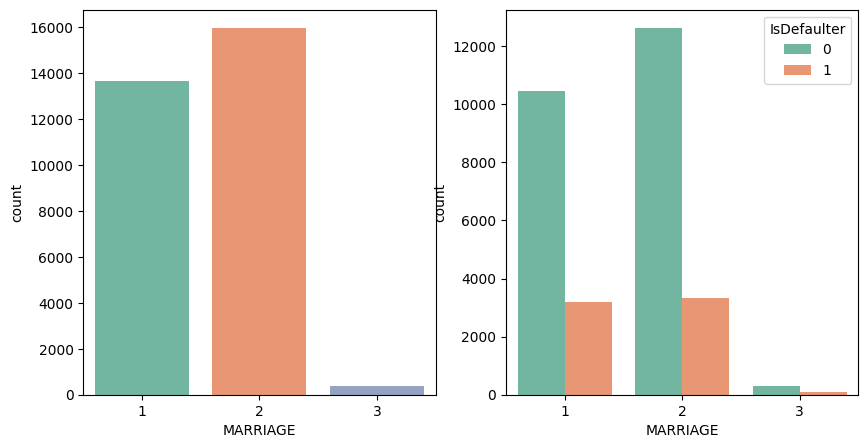

In [ ]:
#count plot for MARRIAGE and with respect to IsDefaulter
fig, axes = plt.subplots(ncols=2,figsize=(10,5))
sns.countplot(x = 'MARRIAGE', ax = axes[0], data = df, palette='Set2')
sns.countplot(x = 'MARRIAGE', hue = 'IsDefaulter',ax = axes[1], data = df, palette='Set2')

## **AGE**

The age range is very large, so I will divide the age group by group

In [ ]:
def assign_group(age):
    if age >= 18 and age <= 24:
        return 0
    elif age >= 25 and age <= 34:
        return 1
    elif age >= 35 and age <= 44:
        return 2
    else:
        return 3

df['AGE_group'] = df['AGE'].apply(assign_group)
df.drop('AGE',axis = 1, inplace = True)
df.head()
# group_age(for i in dfx.AGE)

In [ ]:
#values count for AGE
plt.figure(figsize=(20,8))
sns.countplot(x = 'AGE_group', data = df,  palette='Set2')

In [ ]:
#values count for Age with respect to IsDefaulter
plt.figure(figsize=(20,8))
sns.countplot(x = 'AGE_group', hue = 'IsDefaulter', data = df,  palette='Set2')

# **Handling Class Imbalance**

## **Kmeans-SMOTE** - Synthetic Minority Oversampling Technique

In [ ]:
df.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,PAY_SEPT,PAY_AUG,PAY_JUL,PAY_JUN,PAY_MAY,...,BILL_AMT_MAY,BILL_AMT_APR,PAY_AMT_SEPT,PAY_AMT_AUG,PAY_AMT_JUL,PAY_AMT_JUN,PAY_AMT_MAY,PAY_AMT_APR,IsDefaulter,AGE_group
0,1,20000.0,2,2,1,2,2,0,0,0,...,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1,0
1,2,120000.0,2,2,2,0,2,0,0,0,...,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1,1
2,3,90000.0,2,2,2,0,0,0,0,0,...,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0,1
3,4,50000.0,2,2,1,0,0,0,0,0,...,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0,2
4,5,50000.0,1,2,1,0,0,0,0,0,...,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0,3


In [ ]:
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import KMeansSMOTE

# Standardize the data
scaler = StandardScaler()
df_standardized = scaler.fit_transform(df[(i for i in list(df.describe(include='all').columns) if i != 'IsDefaulter')])

# Apply KMeansSMOTE
kmeans_smote = KMeansSMOTE(cluster_balance_threshold=0.2)
x_smote, y_smote = kmeans_smote.fit_resample(df_standardized, df['IsDefaulter'])

# Create a new dataframe from balanced dataset after KMeansSMOTE
balanced_df = pd.DataFrame(x_smote, columns=list(i for i in list(df.describe(include='all').columns) if i != 'IsDefaulter'))
balanced_df['IsDefaulter'] = y_smote


In [ ]:
#shape of balanced dataframe
balanced_df.shape

(46729, 25)

In [ ]:
#removing feature ID from dataset
balanced_df.drop('ID',axis = 1, inplace = True)

In [ ]:
#final dataset
balanced_df.head()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,PAY_SEPT,PAY_AUG,PAY_JUL,PAY_JUN,PAY_MAY,PAY_APR,...,BILL_AMT_MAY,BILL_AMT_APR,PAY_AMT_SEPT,PAY_AMT_AUG,PAY_AMT_JUL,PAY_AMT_JUN,PAY_AMT_MAY,PAY_AMT_APR,AGE_group,IsDefaulter
0,-1.136720,0.810161,0.21187,-1.068797,2.160496,2.095469,-0.384614,-0.33999,-0.308621,-0.316688,...,-0.663059,-0.652724,-0.341942,-0.227086,-0.296801,-0.308063,-0.314136,-0.293382,-1.773310,1
1,-0.365981,0.810161,0.21187,0.849131,-0.469071,2.095469,-0.384614,-0.33999,-0.308621,2.478850,...,-0.606229,-0.597966,-0.341942,-0.213588,-0.240005,-0.244230,-0.314136,-0.180878,-0.639117,1
2,-0.597202,0.810161,0.21187,0.849131,-0.469071,-0.399186,-0.384614,-0.33999,-0.308621,-0.316688,...,-0.417188,-0.391630,-0.250292,-0.191887,-0.240005,-0.244230,-0.248683,-0.012122,-0.639117,0
3,-0.905498,0.810161,0.21187,-1.068797,-0.469071,-0.399186,-0.384614,-0.33999,-0.308621,-0.316688,...,-0.186729,-0.156579,-0.221191,-0.169361,-0.228645,-0.237846,-0.244166,-0.237130,0.495075,0
4,-0.905498,-1.234323,0.21187,-1.068797,-0.469071,-0.399186,-0.384614,-0.33999,-0.308621,-0.316688,...,-0.348137,-0.331482,-0.221191,1.335034,0.271165,0.266434,-0.269039,-0.255187,1.629267,0


In [ ]:
#to display upto 200 columns and rows at once
pd.set_option('display.max_columns', 200)
pd.set_option('display.max_rows', 200)

In [ ]:
#seperating dependant and independant variabales
X = balanced_df[(list(i for i in list(balanced_df.describe(include='all').columns) if i != 'IsDefaulter'))]
y = balanced_df['IsDefaulter']

In [ ]:
#correlation among all the features
balanced_df.corr()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,PAY_SEPT,PAY_AUG,PAY_JUL,PAY_JUN,PAY_MAY,PAY_APR,BILL_AMT_SEPT,BILL_AMT_AUG,BILL_AMT_JUL,BILL_AMT_JUN,BILL_AMT_MAY,BILL_AMT_APR,PAY_AMT_SEPT,PAY_AMT_AUG,PAY_AMT_JUL,PAY_AMT_JUN,PAY_AMT_MAY,PAY_AMT_APR,AGE_group,IsDefaulter
LIMIT_BAL,1.000000,0.030194,-0.246519,-0.101114,-0.268330,-0.302120,-0.315841,-0.329792,-0.332569,-0.328212,0.334093,0.322790,0.320914,0.320801,0.314034,0.305504,0.222580,0.197267,0.230493,0.227374,0.237977,0.240370,0.146242,-0.344002
SEX,0.030194,1.000000,0.001821,-0.024418,-0.069131,-0.088077,-0.090047,-0.095467,-0.093857,-0.087014,-0.024241,-0.023221,-0.019212,-0.017913,-0.017485,-0.018435,0.010752,0.005786,0.003202,0.002639,0.004369,0.000757,-0.084382,-0.076926
EDUCATION,-0.246519,0.001821,1.000000,-0.161525,0.064150,0.086332,0.085623,0.080875,0.080871,0.070989,-0.028557,-0.032461,-0.035811,-0.045734,-0.051821,-0.052511,-0.049131,-0.037330,-0.047650,-0.047504,-0.053437,-0.050441,0.182555,0.064533
MARRIAGE,-0.101114,-0.024418,-0.161525,1.000000,-0.035705,-0.040851,-0.014105,-0.011572,-0.013233,-0.013138,-0.040817,-0.039595,-0.042969,-0.043722,-0.047562,-0.044972,-0.001011,-0.006634,-0.001639,-0.011778,0.000561,-0.006464,-0.441307,-0.039382
PAY_SEPT,-0.268330,-0.069131,0.064150,-0.035705,1.000000,0.817283,0.669976,0.644143,0.611416,0.567549,0.023105,0.037608,0.049180,0.071924,0.093007,0.099667,-0.130879,-0.095555,-0.109584,-0.106669,-0.092050,-0.091742,0.010842,0.600398
PAY_AUG,-0.302120,-0.088077,0.086332,-0.040851,0.817283,1.000000,0.781043,0.647137,0.610420,0.564395,0.024259,0.036759,0.050147,0.075288,0.097459,0.106108,-0.147947,-0.101487,-0.110187,-0.105720,-0.093761,-0.091452,0.010321,0.610229
PAY_JUL,-0.315841,-0.090047,0.085623,-0.014105,0.669976,0.781043,1.000000,0.820766,0.754559,0.712703,-0.034907,-0.012000,-0.000784,0.026007,0.048152,0.057686,-0.106570,-0.115953,-0.113546,-0.111861,-0.101323,-0.102021,-0.010724,0.603802
PAY_JUN,-0.329792,-0.095467,0.080875,-0.011572,0.644143,0.647137,0.820766,1.000000,0.915462,0.861153,-0.074169,-0.055770,-0.036327,-0.011902,0.011250,0.022249,-0.120465,-0.093342,-0.127566,-0.116908,-0.111951,-0.108832,-0.010062,0.609383
PAY_MAY,-0.332569,-0.093857,0.080871,-0.013233,0.611416,0.610420,0.754559,0.915462,1.000000,0.923530,-0.078284,-0.060812,-0.041878,-0.011674,0.011584,0.023062,-0.120568,-0.093845,-0.102943,-0.123349,-0.115116,-0.109247,-0.016321,0.615855
PAY_APR,-0.328212,-0.087014,0.070989,-0.013138,0.567549,0.564395,0.712703,0.861153,0.923530,1.000000,-0.088054,-0.070956,-0.051583,-0.022818,0.005143,0.016440,-0.116490,-0.091800,-0.103672,-0.100263,-0.122200,-0.108501,-0.014477,0.600870


<Axes: >

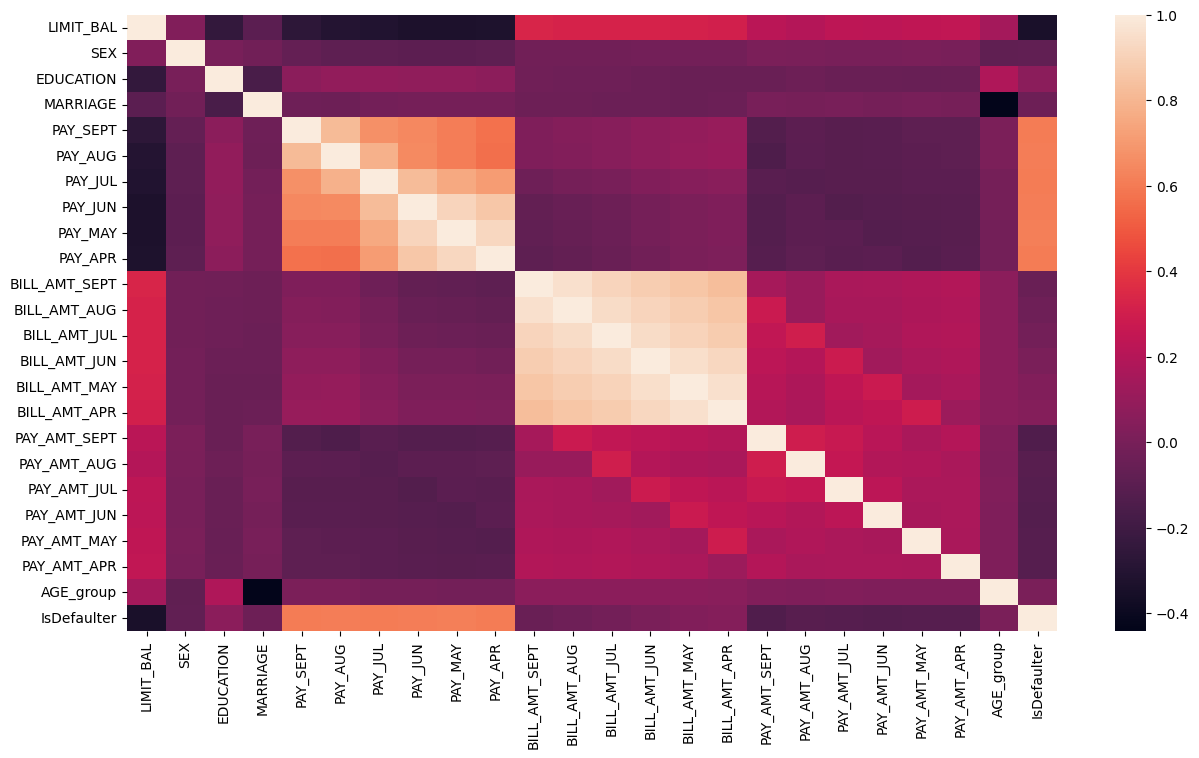

In [ ]:
plt.figure(figsize = (15, 8))

sns.heatmap(balanced_df.corr())

In [ ]:
X.shape

(46729, 23)

In [ ]:
y.shape

(46729,)

# Train Test Splitting

In [ ]:
#importing libraries for splitting data into training and testing dataset
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state=42, stratify=y)

In [ ]:
X_train.shape

(37383, 23)

In [ ]:
X_test.shape

(9346, 23)

# **Baseline Model Implementation - SMOTE over-sampling**

## **Logistic Regression Model**

In [ ]:
#importing logistic regression and evaluation metrics
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, roc_auc_score, confusion_matrix, roc_curve, auc

In [ ]:
#fitting data into Logistic Regression
logi = LogisticRegression()
logi.fit(X_train,y_train)

LogisticRegression()

In [ ]:
#class prediction of y
y_pred_logi = logi.predict(X_test)
y_train_pred_logi=logi.predict(X_train)

In [ ]:
y_pred_proba_logi = logi.predict_proba(X_test)[:,1]

In [ ]:
#getting all scores for Logistic Regression
train_accuracy_logi = round(accuracy_score(y_train_pred_logi,y_train), 3)
accuracy_logi = round(accuracy_score(y_pred_logi,y_test), 3)
precision_score_logi = round(precision_score(y_pred_logi,y_test), 3)
recall_score_logi = round(recall_score(y_pred_logi,y_test), 3)
f1_score_logi = round(f1_score(y_pred_logi,y_test), 3)
roc_score_logi = round(roc_auc_score(y_test,y_pred_proba_logi), 3)

print("The accuracy on train data is ", train_accuracy_logi)
print("The accuracy on test data is ", accuracy_logi)
print("The precision on test data is ", precision_score_logi)
print("The recall on test data is ", recall_score_logi)
print("The f1 on test data is ", f1_score_logi)
print("The roc_score on test data is ", roc_score_logi)

The accuracy on train data is  0.876
The accuracy on test data is  0.88
The precision on test data is  0.84
The recall on test data is  0.914
The f1 on test data is  0.875
The roc_score on test data is  0.923


[[4303  370]
 [ 747 3926]]


[Text(0, 0.5, 'Not Defaulter'), Text(0, 1.5, 'Defaulter')]

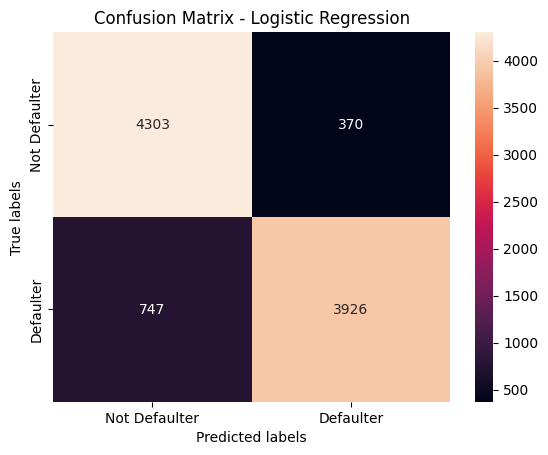

In [ ]:
# Get the confusion matrix
labels = ['Not Defaulter', 'Defaulter']
cm_logi = confusion_matrix(y_test, y_pred_logi )
print(cm_logi)

#plot confusion matrix
ax= plt.subplot()
sns.heatmap(cm_logi, annot=True,fmt='d', ax = ax)

# labels, title and ticks
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix - Logistic Regression')
ax.xaxis.set_ticklabels(labels)
ax.yaxis.set_ticklabels(labels)

## **Decision Tree Classification**

In [ ]:
#importing Decision Tree Classifier
from sklearn.tree import DecisionTreeClassifier
#fitting data into Decision Tree Classifier
dtc = DecisionTreeClassifier()
dtc.fit(X_train, y_train)

DecisionTreeClassifier()

In [ ]:
#class prediction of y
y_pred_dtc = dtc.predict(X_test)
y_train_pred_dtc=dtc.predict(X_train)

In [ ]:
y_pred_proba_dtc = dtc.predict_proba(X_test)[:,1]

In [ ]:
#getting all scores for Decision Tree Classifier
train_accuracy_dtc = round(accuracy_score(y_train_pred_dtc,y_train), 3)
accuracy_dtc = round(accuracy_score(y_pred_dtc,y_test), 3)
precision_score_dtc = round(precision_score(y_pred_dtc,y_test), 3)
recall_score_dtc = round(recall_score(y_pred_dtc,y_test), 3)
f1_score_dtc = round(f1_score(y_pred_dtc,y_test), 3)
roc_score_dtc = round(roc_auc_score(y_test,y_pred_proba_dtc), 3)

print("The accuracy on train data is ", train_accuracy_dtc)
print("The accuracy on test data is ", accuracy_dtc)
print("The precision on test data is ", precision_score_dtc)
print("The recall on test data is ", recall_score_dtc)
print("The f1 on test data is ", f1_score_dtc)
print("The roc_score on test data is ", roc_score_dtc)

The accuracy on train data is  0.998
The accuracy on test data is  0.82
The precision on test data is  0.838
The recall on test data is  0.809
The f1 on test data is  0.823
The roc_score on test data is  0.821


[[3748  925]
 [ 759 3914]]


[Text(0, 0.5, 'Not Defaulter'), Text(0, 1.5, 'Defaulter')]

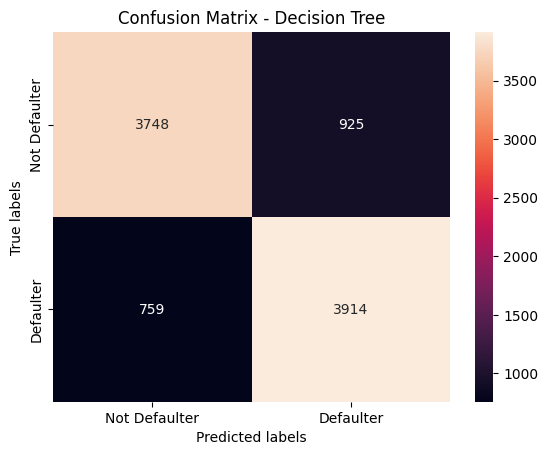

In [ ]:
# Get the confusion matrix for decision tree classifier
labels = ['Not Defaulter', 'Defaulter']
cm_dtc = confusion_matrix(y_test, y_pred_dtc )
print(cm_dtc)

#plot confusion matrix
ax= plt.subplot()
sns.heatmap(cm_dtc, annot=True, fmt='d',ax = ax)

# labels, title and ticks
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix - Decision Tree')
ax.xaxis.set_ticklabels(labels)
ax.yaxis.set_ticklabels(labels)

## **Random Forest Classification**

In [ ]:
#importing Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier

In [ ]:

#fitting data into Random Forest Classifier
rfc=RandomForestClassifier(n_estimators=50)
rfc.fit(X_train, y_train)

RandomForestClassifier(n_estimators=50)

In [ ]:
#class prediction of y
y_pred_rfc=rfc.predict(X_test)
y_train_pred_rfc=rfc.predict(X_train)

In [ ]:
y_pred_proba_rfc = rfc.predict_proba(X_test)[:,1]

In [ ]:
#getting all scores for Random Forest Classifier
train_accuracy_rfc = round(accuracy_score(y_train_pred_rfc,y_train), 3)
accuracy_rfc = round(accuracy_score(y_pred_rfc,y_test), 3)
precision_score_rfc = round(precision_score(y_pred_rfc,y_test), 3)
recall_score_rfc = round(recall_score(y_pred_rfc,y_test), 3)
f1_score_rfc = round(f1_score(y_pred_rfc,y_test), 3)
roc_score_rfc = round(roc_auc_score(y_test,y_pred_proba_rfc), 3)

print("The accuracy on train data is ", train_accuracy_rfc)
print("The accuracy on test data is ", accuracy_rfc)
print("The precision on test data is ", precision_score_rfc)
print("The recall on test data is ", recall_score_rfc)
print("The f1 on test data is ", f1_score_rfc)
print("The roc_score on test data is ", roc_score_rfc)

The accuracy on train data is  0.998
The accuracy on test data is  0.885
The precision on test data is  0.846
The recall on test data is  0.918
The f1 on test data is  0.881
The roc_score on test data is  0.933


[[4320  353]
 [ 718 3955]]


[Text(0, 0.5, 'Not Defaulter'), Text(0, 1.5, 'Defaulter')]

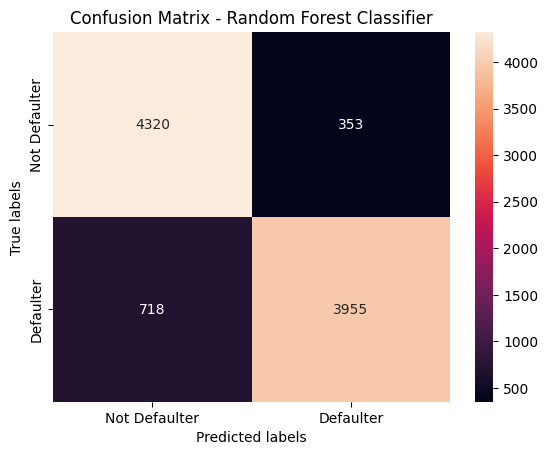

In [ ]:
# Get the confusion matrix for Random Forest Classifier
labels = ['Not Defaulter', 'Defaulter']
cm_rfc = confusion_matrix(y_test, y_pred_rfc )
print(cm_rfc)

#plot confusion matrix
ax= plt.subplot()
sns.heatmap(cm_rfc, annot=True, fmt='d',ax = ax)

# labels, title and ticks
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix - Random Forest Classifier')
ax.xaxis.set_ticklabels(labels)
ax.yaxis.set_ticklabels(labels)

## **Support Vector Machine**

In [ ]:
#importing Support Vector Classifier
from sklearn.svm import SVC

In [ ]:
#fitting data into Support Vector Classifier
svm=SVC(probability=True)
svm.fit(X_train,y_train)

SVC(probability=True)

In [ ]:
#class prediction of y
y_pred_svm=svm.predict(X_test)
y_train_pred_svm=svm.predict(X_train)

In [ ]:
y_pred_proba_svm = svm.predict_proba(X_test)[:,1]

In [ ]:
#getting all scores for Support Vector Classifier
train_accuracy_svm = round(accuracy_score(y_train_pred_svm,y_train), 3)
accuracy_svm = round(accuracy_score(y_pred_svm,y_test), 3)
precision_score_svm = round(precision_score(y_pred_svm,y_test), 3)
recall_score_svm = round(recall_score(y_pred_svm,y_test), 3)
f1_score_svm = round(f1_score(y_pred_svm,y_test), 3)
roc_score_svm = round(roc_auc_score(y_test,y_pred_proba_svm), 3)

print("The accuracy on train data is ", train_accuracy_svm)
print("The accuracy on test data is ", accuracy_svm)
print("The precision on test data is ", precision_score_svm)
print("The recall on test data is ", recall_score_svm)
print("The f1 on test data is ", f1_score_svm)
print("The roc_score on test data is ", roc_score_svm)

The accuracy on train data is  0.88
The accuracy on test data is  0.884
The precision on test data is  0.847
The recall on test data is  0.915
The f1 on test data is  0.88
The roc_score on test data is  0.914


[[4307  366]
 [ 716 3957]]


[Text(0, 0.5, 'Not Defaulter'), Text(0, 1.5, 'Defaulter')]

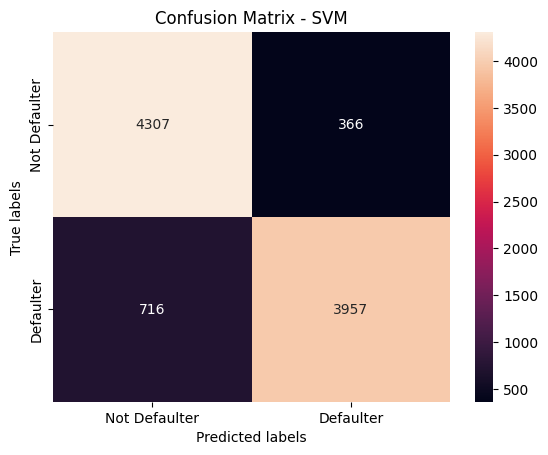

In [ ]:
# Get the confusion matrix for Support Vector Classifier
labels = ['Not Defaulter', 'Defaulter']
cm_svm = confusion_matrix(y_test, y_pred_svm )
print(cm_svm)

#plot confusion matrix
ax= plt.subplot()
sns.heatmap(cm_svm, annot=True,fmt='d', ax = ax)

# labels, title and ticks
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix - SVM')
ax.xaxis.set_ticklabels(labels)
ax.yaxis.set_ticklabels(labels)

## **Gradient Boosting**

In [ ]:
#importing Gradient Boosting Classifier
from sklearn.ensemble import GradientBoostingClassifier

In [ ]:
#importing Gradient Boosting Classifier
from sklearn.ensemble import GradientBoostingClassifier
#fitting data into Gradient Boosting Classifier
gbc = GradientBoostingClassifier(random_state=42)
gbc.fit(X_train, y_train)

GradientBoostingClassifier(random_state=42)

In [ ]:
#class prediction of y
y_pred_gbc=gbc.predict(X_test)
y_train_pred_gbc=gbc.predict(X_train)

In [ ]:
y_pred_proba_gbc = gbc.predict_proba(X_test)[:,1]

In [ ]:
#getting all scores for Gradient Boosting Classifier
train_accuracy_gbc = round(accuracy_score(y_train_pred_gbc,y_train), 3)
accuracy_gbc = round(accuracy_score(y_pred_gbc,y_test), 3)
precision_score_gbc = round(precision_score(y_pred_gbc,y_test), 3)
recall_score_gbc = round(recall_score(y_pred_gbc,y_test), 3)
f1_score_gbc = round(f1_score(y_pred_gbc,y_test), 3)
roc_score_gbc = round(roc_auc_score(y_test,y_pred_proba_gbc), 3)

print("The accuracy on train data is ", train_accuracy_gbc)
print("The accuracy on test data is ", accuracy_gbc)
print("The precision on test data is ", precision_score_gbc)
print("The recall on test data is ", recall_score_gbc)
print("The f1 on test data is ", f1_score_gbc)
print("The roc_score on test data is ", roc_score_gbc)

The accuracy on train data is  0.883
The accuracy on test data is  0.887
The precision on test data is  0.846
The recall on test data is  0.921
The f1 on test data is  0.882
The roc_score on test data is  0.935


[[4332  341]
 [ 719 3954]]


[Text(0, 0.5, 'Not Defaulter'), Text(0, 1.5, 'Defaulter')]

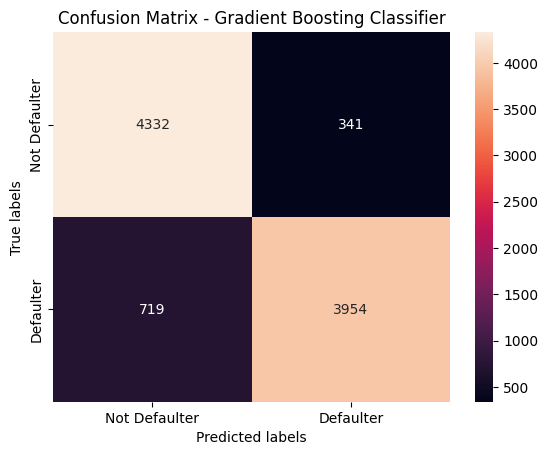

In [ ]:
# Get the confusion matrix for Gradient Boosting Classifier
labels = ['Not Defaulter', 'Defaulter']
cm_gbc = confusion_matrix(y_test, y_pred_gbc )
print(cm_gbc)

#plot confusion matrix
ax= plt.subplot()
sns.heatmap(cm_gbc, annot=True,fmt='d', ax = ax)

# labels, title and ticks
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix - Gradient Boosting Classifier')
ax.xaxis.set_ticklabels(labels)
ax.yaxis.set_ticklabels(labels)

## **XG Boosting**

In [ ]:
#importing XG Boosting Classifier
from xgboost import XGBClassifier

In [ ]:
#importing XG Boosting Classifier
from xgboost import XGBClassifier
#fitting data into XG Boosting Classifier
xgb = XGBClassifier()
xgb.fit(X_train,y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

In [ ]:
#class prediction of y
y_pred_xgb=xgb.predict(X_test)
y_train_pred_xgb=xgb.predict(X_train)
# y_pred_proba_xgb = xgb.predict_proba(X_test)[:,1]


In [ ]:
y_pred_proba_xgb = xgb.predict_proba(X_test)[:,1]

In [ ]:
#getting all scores for XG Boosting Classifier
train_accuracy_xgb = round(accuracy_score(y_train_pred_xgb,y_train), 3)
accuracy_xgb = round(accuracy_score(y_pred_xgb,y_test), 3)
precision_score_xgb = round(precision_score(y_pred_xgb,y_test), 3)
recall_score_xgb = round(recall_score(y_pred_xgb,y_test), 3)
f1_score_xgb = round(f1_score(y_pred_xgb,y_test), 3)
roc_score_xgb = round(roc_auc_score(y_test,y_pred_proba_xgb), 3)

print("The accuracy on train data is ", train_accuracy_xgb)
print("The accuracy on test data is ", accuracy_xgb)
print("The precision on test data is ", precision_score_xgb)
print("The recall on test data is ", recall_score_xgb)
print("The f1 on test data is ", f1_score_xgb)
print("The roc_score on test data is ", roc_score_xgb)

The accuracy on train data is  0.917
The accuracy on test data is  0.883
The precision on test data is  0.835
The recall on test data is  0.924
The f1 on test data is  0.877
The roc_score on test data is  0.935


[[4350  323]
 [ 771 3902]]


[Text(0, 0.5, 'Not Defaulter'), Text(0, 1.5, 'Defaulter')]

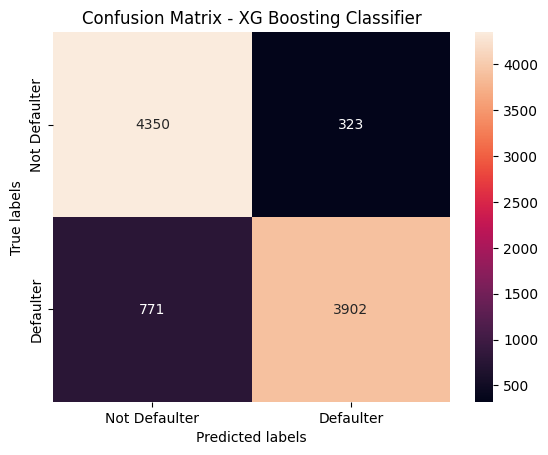

In [ ]:
# Get the confusion matrix for XG Boosting Classifier
labels = ['Not Defaulter', 'Defaulter']
cm_xgb = confusion_matrix(y_test, y_pred_xgb )
print(cm_xgb)

#plot confusion matrix
ax= plt.subplot()
sns.heatmap(cm_xgb, annot=True, fmt='d',ax = ax)

# labels, title and ticks
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix - XG Boosting Classifier')
ax.xaxis.set_ticklabels(labels)
ax.yaxis.set_ticklabels(labels)

# **Baseline Model Comparision**

In [ ]:
all_lassifiers = ['Logistic Regression', 'Decision Tree', 'Random Forest', 'SVM', 'Gradient Boosting', 'XG Boosting']
all_train_accuracy = [train_accuracy_logi, train_accuracy_dtc, train_accuracy_rfc, train_accuracy_svm, train_accuracy_gbc, train_accuracy_xgb]
all_test_accuracy = [accuracy_logi, accuracy_dtc, accuracy_rfc, accuracy_svm, accuracy_gbc, accuracy_xgb]
all_precision_score = [precision_score_logi, precision_score_dtc, precision_score_rfc, precision_score_svm, precision_score_gbc, precision_score_xgb]
all_recall_score = [recall_score_logi, recall_score_dtc, recall_score_rfc, recall_score_svm, recall_score_gbc, recall_score_xgb]
all_f1_score = [f1_score_logi, f1_score_dtc, f1_score_rfc, f1_score_svm, f1_score_gbc, f1_score_xgb]
all_auc_score = [roc_score_logi, roc_score_dtc, roc_score_rfc, roc_score_svm, roc_score_gbc, roc_score_xgb]

In [ ]:
compare_df = pd.DataFrame({'Classifier':all_lassifiers, 'Train Accuracy': all_train_accuracy, 'Test Accuracy': all_test_accuracy, 'Precision': all_precision_score, 'Recall': all_recall_score, 'F1 Score': all_f1_score , 'AUC': all_auc_score})

In [ ]:
compare_df

,Classifier,Train Accuracy,Test Accuracy,Precision,Recall,F1 Score,AUC
0,Logistic Regression,0.876,0.880,0.840,0.914,0.875,0.923
1,Decision Tree,0.998,0.820,0.838,0.809,0.823,0.821
2,Random Forest,0.998,0.885,0.846,0.918,0.881,0.933
3,SVM,0.880,0.884,0.847,0.915,0.880,0.914
4,Gradient Boosting,0.883,0.887,0.846,0.921,0.882,0.935
5,XG Boosting,0.917,0.883,0.835,0.924,0.877,0.935


In [ ]:
compare_df.sort_values(by=['Test Accuracy'], ascending=False)

,Classifier,Train Accuracy,Test Accuracy,Precision,Recall,F1 Score,AUC
4,Gradient Boosting,0.883,0.887,0.846,0.921,0.882,0.935
2,Random Forest,0.998,0.885,0.846,0.918,0.881,0.933
3,SVM,0.880,0.884,0.847,0.915,0.880,0.914
5,XG Boosting,0.917,0.883,0.835,0.924,0.877,0.935
0,Logistic Regression,0.876,0.880,0.840,0.914,0.875,0.923
1,Decision Tree,0.998,0.820,0.838,0.809,0.823,0.821


- Random forest classifier shows highest test accuracy and F1 score.

## Combined ROC curve for all the models

In [ ]:
#importing roc curve
from sklearn.metrics import roc_curve

In [ ]:

#probabilty prediction of y for all model
y_pred_proba_logi = logi.predict_proba(X_test)[:,1]
y_pred_proba_dtc = dtc.predict_proba(X_test)[:,1]
y_pred_proba_rfc = rfc.predict_proba(X_test)[:,1]
y_pred_proba_svm = svm.predict_proba(X_test)[:,1]
y_pred_proba_gbc = gbc.predict_proba(X_test)[:,1]
y_pred_proba_xgb = xgb.predict_proba(X_test)[:,1]


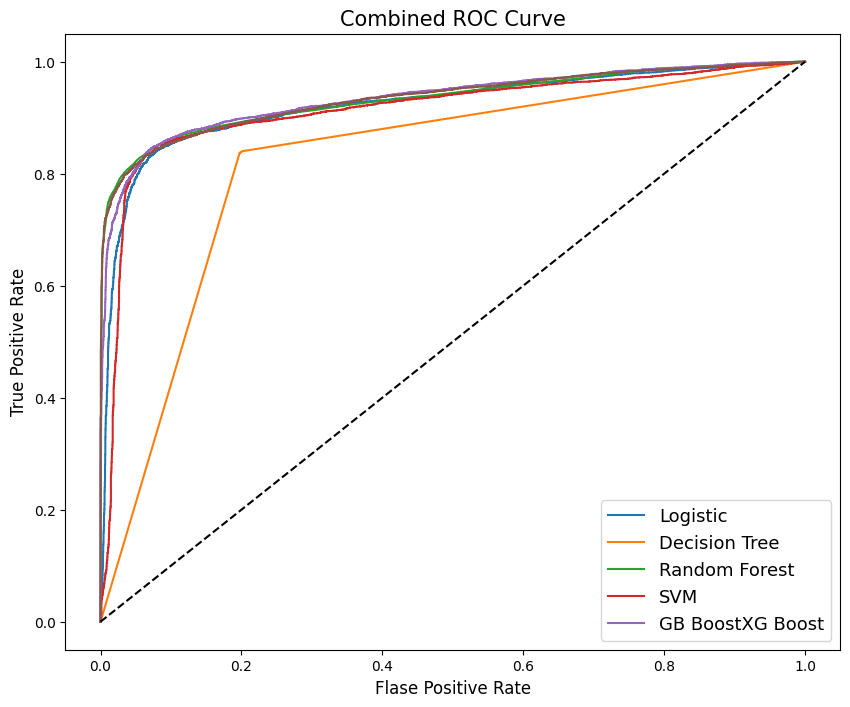

In [ ]:
fig = plt.figure(figsize=(10,8))

fpr_logi, tpr_logi, _logi = roc_curve(y_test,  y_pred_proba_logi)
fpr_dtc, tpr_dtc, _dtc = roc_curve(y_test,  y_pred_proba_dtc)
fpr_rfc, tpr_rfc, _rfc = roc_curve(y_test,  y_pred_proba_rfc)
fpr_svm, tpr_svm, _svm = roc_curve(y_test,  y_pred_proba_svm)
fpr_gbc, tpr_gbc, _gbc = roc_curve(y_test,  y_pred_proba_gbc)
fpr_xgb, tpr_xgb, _xgb = roc_curve(y_test,  y_pred_proba_xgb)

plt.plot(fpr_logi, tpr_logi)
plt.plot(fpr_dtc, tpr_dtc)
plt.plot(fpr_rfc, tpr_rfc)
plt.plot(fpr_svm, tpr_svm)
plt.plot(fpr_gbc, tpr_gbc)
plt.plot(fpr_xgb, tpr_xgb)

plt.plot([0,1], [0,1], color='black', linestyle='--')

plt.xlabel("Flase Positive Rate", fontsize=12)
plt.ylabel("True Positive Rate", fontsize=12)
plt.title('Combined ROC Curve', fontsize=15)

plt.legend(["Logistic", "Decision Tree", "Random Forest", "SVM", "GB Boost" "XG Boost"], prop={'size':13}, loc='lower right' )

# **Feature Importance On Random Forest Model**

In [ ]:
features = list(i for i in list(balanced_df.describe(include='all').columns) if i != 'IsDefaulter')

In [ ]:
feature_importances_rfc = rfc.feature_importances_

In [ ]:
feature_importances_rfc_df = pd.Series(feature_importances_rfc, index=features)

In [ ]:
feature_importances_rfc_df.sort_values(ascending=False)[0:15]

PAY_JUN          0.143685
PAY_MAY          0.093361
PAY_SEPT         0.092683
PAY_JUL          0.087990
PAY_APR          0.087660
PAY_AUG          0.074480
LIMIT_BAL        0.043457
PAY_AMT_SEPT     0.033090
BILL_AMT_SEPT    0.032283
BILL_AMT_AUG     0.029466
PAY_AMT_AUG      0.028863
BILL_AMT_APR     0.028538
BILL_AMT_MAY     0.027835
BILL_AMT_JUL     0.027781
BILL_AMT_JUN     0.027208
dtype: float64

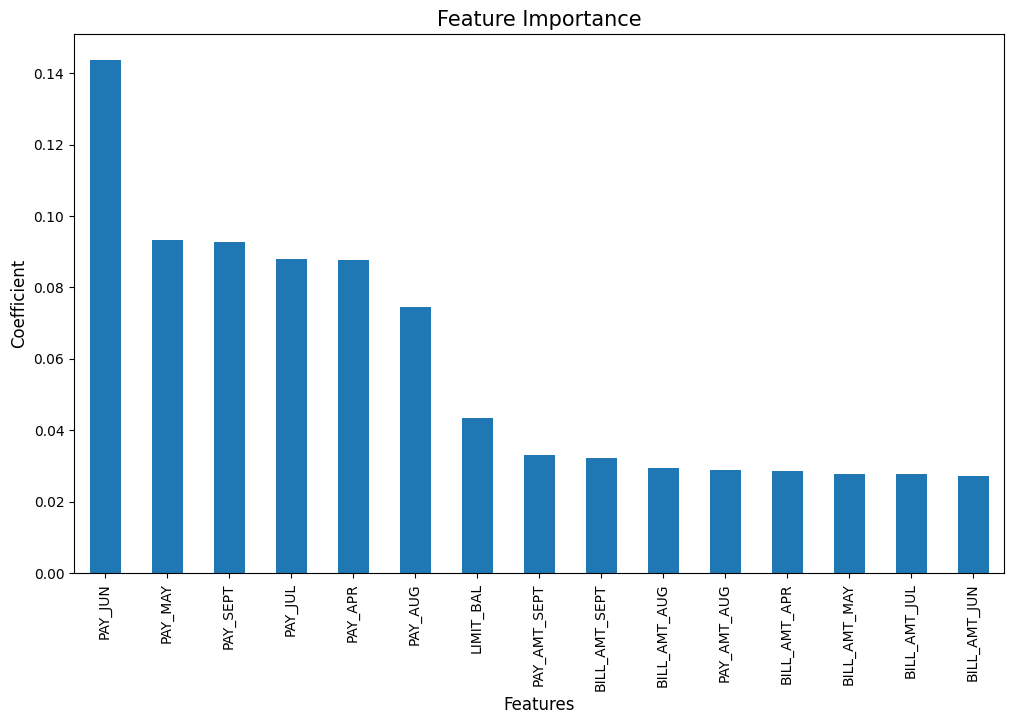

In [ ]:
fig = plt.figure(figsize=(12,7))
feature_importances_rfc_df.nlargest(15).plot(kind='bar')
plt.xlabel("Features", fontsize=12)
plt.ylabel("Coefficient", fontsize=12)
plt.title('Feature Importance', fontsize=15)
plt.show()

- Above 15 features are the most important features of random forest classifier.

# **Cross Validation & Hyperparameter Tuning ( Grid search CV)**

In [ ]:
from sklearn.model_selection import GridSearchCV

## **Logistic Regression Model**

In [ ]:
# penalty in Logistic Regression Classifier
penalties = ['l1','l2', 'elasticnet', 'none']

# hyperparameter C
C= [ 0.001, 0.1, 0.5, 1, 1.5, 5, 10]

# Hyperparameter Grid
param_dict = {'penalty':penalties,
              'max_iter' : [100, 1000,2500],
              'C' : C }

In [ ]:
# Create an instance of the Logistic Regression
logi = LogisticRegression()

# Grid search
logi_grid = GridSearchCV(estimator=logi,
                       param_grid = param_dict,
                       cv = 5, verbose=3, n_jobs = -1, scoring='roc_auc')
# fitting model
logi_grid.fit(X_train,y_train)

Fitting 5 folds for each of 84 candidates, totalling 420 fits


GridSearchCV(cv=5, estimator=LogisticRegression(), n_jobs=-1,
             param_grid={'C': [0.001, 0.1, 0.5, 1, 1.5, 5, 10],
                         'max_iter': [100, 1000, 2500],
                         'penalty': ['l1', 'l2', 'elasticnet', 'none']},
             scoring='roc_auc', verbose=3)

In [ ]:
logi_grid.best_estimator_

LogisticRegression(C=0.001, penalty='none')

In [ ]:
logi_grid.best_params_

{'C': 0.001, 'max_iter': 100, 'penalty': 'none'}

In [ ]:
logi_optimal_model = logi_grid.best_estimator_

In [ ]:
#class prediction of y on train and test
y_pred_logi_grid = logi_optimal_model.predict(X_test)
y_train_pred_logi_grid = logi_optimal_model.predict(X_train)

# Get the probabilities on train and test
y_pred_prob_logi_grid = logi_optimal_model.predict_proba(X_train)[:,1]
y_train_pred_prob_logi_grid = logi_optimal_model.predict_proba(X_test)[:,1]

In [ ]:
#getting all scores for Logistic Regression after CV and Hyperparameter Tunning
train_accuracy_logi_grid = round(accuracy_score(y_train_pred_logi_grid,y_train), 3)
accuracy_logi_grid = round(accuracy_score(y_pred_logi_grid,y_test), 3)
precision_score_logi_grid = round(precision_score(y_pred_logi_grid, y_test), 3)
recall_score_logi_grid = round(recall_score(y_pred_logi_grid,y_test), 3)
f1_score_logi_grid = round(f1_score(y_pred_logi_grid,y_test), 3)
auc_logi_grid = round(roc_auc_score(y_test, y_train_pred_prob_logi_grid), 3)

print("The accuracy on train data is ", train_accuracy_logi_grid)
print("The accuracy on test data is ", accuracy_logi_grid)
print("The precision on test data is ", precision_score_logi_grid)
print("The recall on test data is ", recall_score_logi_grid)
print("The f1 on test data is ", f1_score_logi_grid)
print("The auc on test data is ", auc_logi_grid)

The accuracy on train data is  0.876
The accuracy on test data is  0.88
The precision on test data is  0.84
The recall on test data is  0.914
The f1 on test data is  0.875
The auc on test data is  0.923


In [ ]:
# Get the confusion matrices for train and test
train_cm_logi_grid = confusion_matrix(y_train,y_train_pred_logi_grid)
test_cm_logi_grid = confusion_matrix(y_test,y_pred_logi_grid )

In [ ]:
train_cm_logi_grid

array([[17194,  1497],
       [ 3138, 15554]])

In [ ]:
test_cm_logi_grid

array([[4303,  370],
       [ 747, 3926]])

### plot

In [ ]:
from tabulate import tabulate
from sklearn.metrics import classification_report, accuracy_score


train_accuracy_logi_grid = round(accuracy_score(y_train_pred_logi_grid,y_train), 3)
accuracy_logi_grid = round(accuracy_score(y_pred_logi_grid,y_test), 3)
precision_score_logi_grid = round(precision_score(y_pred_logi_grid, y_test), 3)
recall_score_logi_grid = round(recall_score(y_pred_logi_grid,y_test), 3)
f1_score_logi_grid = round(f1_score(y_pred_logi_grid,y_test), 3)
auc_logi_grid = round(roc_auc_score(y_test, y_train_pred_prob_logi_grid), 3)

# Create a table with the evaluation metrics
table_data = [
    ["Metric", "Accuracy", "Precision", "Recall", "F1-Score"],
    ["Train", train_accuracy_logi_grid, "", "", ""],
    ["Test", accuracy_logi_grid, precision_score_logi_grid, recall_score_logi_grid, f1_score_logi_grid]
]
# table_data = [
#     ["Metric", "Train", "Test"],
#     ["Accuracy", train_accuracy_logi_grid, accuracy_logi_grid],
#     ["Precision","" ,precision_score_logi_grid],
#     ["Recall","", recall_score_logi_grid],
#     ["F1-Score","" ,f1_score_logi_grid]
#     # ,["AUC", "", auc_logi_grid]
# ]

table = tabulate(table_data, headers="firstrow", tablefmt="fancy_grid")

# Print the table
print(table)


╒══════════╤════════════╤═════════════╤══════════╤════════════╕
│ Metric   │   Accuracy │ Precision   │ Recall   │ F1-Score   │
╞══════════╪════════════╪═════════════╪══════════╪════════════╡
│ Train    │      0.876 │             │          │            │
├──────────┼────────────┼─────────────┼──────────┼────────────┤
│ Test     │      0.88  │ 0.84        │ 0.914    │ 0.875      │
╘══════════╧════════════╧═════════════╧══════════╧════════════╛


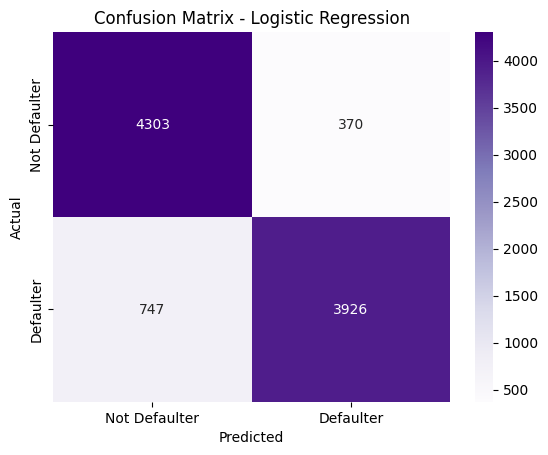

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

labels = ['Not Defaulter', 'Defaulter']

# Vẽ confusion matrix bằng seaborn
heatmap = sns.heatmap(test_cm_logi_grid, annot=True,fmt='d', cmap='Purples')
heatmap.xaxis.set_ticklabels(labels)
heatmap.yaxis.set_ticklabels(labels)

# Thiết lập tên các trục và tiêu đề
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - Logistic Regression')

# Hiển thị đồ thị
plt.show()


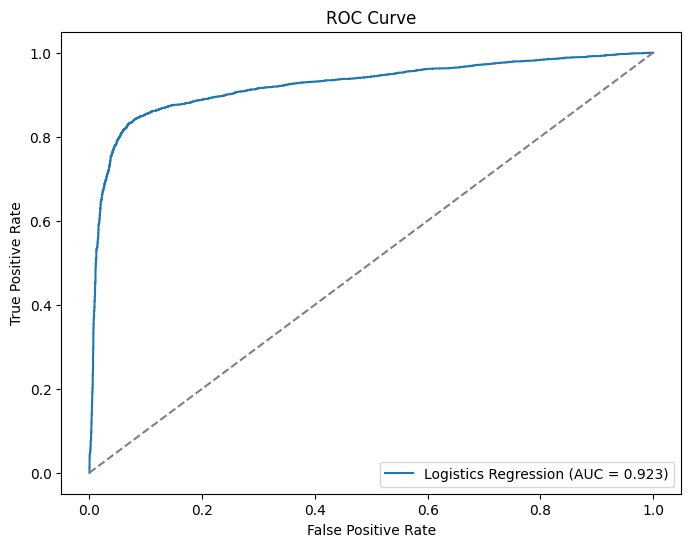

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, roc_auc_score

def plot_auc_roc_curve(y_train_pred_prob_model_grid):
    plt.figure(figsize=(8, 6))

    y_pred_proba = y_train_pred_prob_model_grid
    fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
    roc_auc = roc_auc_score(y_test, y_pred_proba)

    plt.plot(fpr, tpr, label=f'{"Logistics Regression"} (AUC = {roc_auc:.3f})')

    plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve')
    plt.legend(loc='lower right')
    # plt.text(0.8, 0.2, f'AUC = {roc_auc:.2f}', fontsize=12, ha='center')
    plt.show()

plot_auc_roc_curve(y_train_pred_prob_logi_grid)


## **Decision Tree Classification**

In [ ]:
# The maximum depth of the tree
depth_of_tree = [20,25,30]

# The minimum number of samples required to split an internal node
min_samples_split = [0.001,0.01,0.05]

# Minimum number of samples required at each leaf node
min_samples_leaf = [40,50,60]

# Hyperparameter Grid
param_dict = {'max_depth': depth_of_tree,
              'min_samples_split':min_samples_split,
              'min_samples_leaf': min_samples_leaf}

In [ ]:
# Create an instance of the decision tree
dtc = DecisionTreeClassifier()

# Grid search
dtc_grid = GridSearchCV(estimator=dtc,
                       param_grid = param_dict,
                       cv = 5, verbose=3, n_jobs = -1, scoring='roc_auc')
# fitting model
dtc_grid.fit(X_train, y_train)

Fitting 5 folds for each of 27 candidates, totalling 135 fits


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'max_depth': [20, 25, 30],
                         'min_samples_leaf': [40, 50, 60],
                         'min_samples_split': [0.001, 0.01, 0.05]},
             scoring='roc_auc', verbose=3)

In [ ]:
dtc_grid.best_estimator_

DecisionTreeClassifier(max_depth=20, min_samples_leaf=60,
                       min_samples_split=0.01)

In [ ]:
dtc_grid.best_params_

{'max_depth': 20, 'min_samples_leaf': 60, 'min_samples_split': 0.01}

In [ ]:
dtc_optimal_model = dtc_grid.best_estimator_

In [ ]:
#class prediction of y on train and test
y_pred_dtc_grid=dtc_optimal_model.predict(X_test)
y_train_pred_dtc_grid=dtc_optimal_model.predict(X_train)

# Get the probabilities on train and test
y_pred_prob_dtc_grid = dtc_optimal_model.predict_proba(X_train)[:,1]
y_train_pred_prob_dtc_grid = dtc_optimal_model.predict_proba(X_test)[:,1]

In [ ]:
# #getting all scores for decision tree after CV and Hyperparameter Tunning
# train_accuracy_dtc_grid = round(accuracy_score(y_train_pred_dtc_grid,y_train), 3)
# accuracy_dtc_grid = round(accuracy_score(y_pred_dtc_grid,y_test), 3)
# precision_score_dtc_grid = round(precision_score(y_pred_dtc_grid,y_test), 3)
# recall_score_dtc_grid = round(recall_score(y_pred_dtc_grid,y_test), 3)
# f1_score_dtc_grid = round(f1_score(y_pred_dtc_grid,y_test), 3)
# auc_dtc_grid = round(roc_auc_score(y_pred_dtc_grid,y_test), 3)

# print("The accuracy on train data is ", train_accuracy_dtc_grid)
# print("The accuracy on test data is ", accuracy_dtc_grid)
# print("The precision on test data is ", precision_score_dtc_grid)
# print("The recall on test data is ", recall_score_dtc_grid)
# print("The f1 on test data is ", f1_score_dtc_grid)
# print("The auc on test data is ", auc_dtc_grid)

The accuracy on train data is  0.88
The accuracy on test data is  0.883
The precision on test data is  0.845
The recall on test data is  0.915
The f1 on test data is  0.879
The auc on test data is  0.885


In [ ]:
# Get the confusion matrices for train and test
train_cm_dtc_grid = confusion_matrix(y_train,y_train_pred_dtc_grid)
test_cm_dtc_grid = confusion_matrix(y_test,y_pred_dtc_grid )

### plot

In [ ]:
from tabulate import tabulate
from sklearn.metrics import classification_report, accuracy_score


train_accuracy_dtc_grid = round(accuracy_score(y_train_pred_dtc_grid,y_train), 3)
accuracy_dtc_grid = round(accuracy_score(y_pred_dtc_grid,y_test), 3)
precision_score_dtc_grid = round(precision_score(y_pred_dtc_grid, y_test), 3)
recall_score_dtc_grid = round(recall_score(y_pred_dtc_grid,y_test), 3)
f1_score_dtc_grid = round(f1_score(y_pred_dtc_grid,y_test), 3)
auc_dtc_grid = round(roc_auc_score(y_test, y_train_pred_prob_dtc_grid), 3)


# Create a table with the evaluation metrics
table_data = [
    ["Metric", "Accuracy", "Precision", "Recall", "F1-Score"],
    ["Train", train_accuracy_dtc_grid, "", "", ""],
    ["Test", accuracy_dtc_grid, precision_score_dtc_grid, recall_score_dtc_grid, f1_score_dtc_grid]
]
# table_data = [
#     ["Metric", "Train", "Test"],
#     ["Accuracy", train_accuracy_dtc_grid, accuracy_dtc_grid],
#     ["Precision","" ,precision_score_dtc_grid],
#     ["Recall","", recall_score_dtc_grid],
#     ["F1-Score","" ,f1_score_dtc_grid],
#     ["AUC", "", auc_dtc_grid]
# ]

table = tabulate(table_data, headers="firstrow", tablefmt="fancy_grid")

# Print the table
print(table)


╒══════════╤════════════╤═════════════╤══════════╤════════════╕
│ Metric   │   Accuracy │ Precision   │ Recall   │ F1-Score   │
╞══════════╪════════════╪═════════════╪══════════╪════════════╡
│ Train    │      0.878 │             │          │            │
├──────────┼────────────┼─────────────┼──────────┼────────────┤
│ Test     │      0.881 │ 0.841       │ 0.913    │ 0.876      │
╘══════════╧════════════╧═════════════╧══════════╧════════════╛


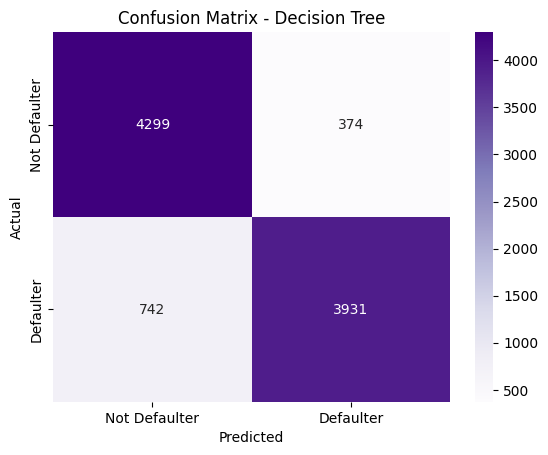

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

labels = ['Not Defaulter', 'Defaulter']

# Vẽ confusion matrix bằng seaborn
heatmap = sns.heatmap(test_cm_dtc_grid, annot=True,fmt='d', cmap='Purples')
heatmap.xaxis.set_ticklabels(labels)
heatmap.yaxis.set_ticklabels(labels)

# Thiết lập tên các trục và tiêu đề
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - Decision Tree')

# Hiển thị đồ thị
plt.show()


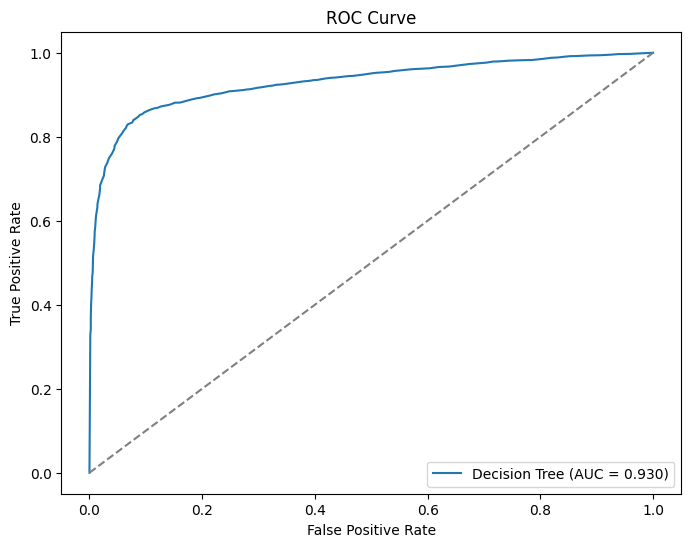

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, roc_auc_score

def plot_auc_roc_curve(y_train_pred_prob_model_grid):
    plt.figure(figsize=(8, 6))

    y_pred_proba = y_train_pred_prob_model_grid
    fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
    roc_auc = roc_auc_score(y_test, y_pred_proba)

    plt.plot(fpr, tpr, label=f'{"Decision Tree"} (AUC = {roc_auc:.3f})')

    plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve')
    plt.legend(loc='lower right')
    # plt.text(0.8, 0.2, f'AUC = {roc_auc:.2f}', fontsize=12, ha='center')
    plt.show()

plot_auc_roc_curve(y_train_pred_prob_dtc_grid)

## **Support Vector Machine**

In [ ]:
from sklearn.model_selection import RandomizedSearchCV

In [ ]:
# Hyperparameter Grid
param_dict = {'C':[1, 10] ,
              'kernel': ['rbf']}

In [ ]:
# Create an instance of the support vector classifier
svm=SVC(probability=True)

# Grid search
svm_grid = RandomizedSearchCV(estimator = svm, param_distributions = param_dict,
                       cv = 2, verbose=2, n_jobs = -1, scoring= 'roc_auc')
# fitting model
svm_grid.fit(X_train, y_train)

Fitting 2 folds for each of 2 candidates, totalling 4 fits


RandomizedSearchCV(cv=2, estimator=SVC(probability=True), n_jobs=-1,
                   param_distributions={'C': [1, 10], 'kernel': ['rbf']},
                   scoring='roc_auc', verbose=2)

In [ ]:
svm_grid.best_estimator_

SVC(C=1, probability=True)

In [ ]:
svm_grid.best_params_

{'kernel': 'rbf', 'C': 1}

In [ ]:
svm_optimal_model = svm_grid.best_estimator_

In [ ]:
#class prediction of y on train and test
y_pred_svm_grid=svm_optimal_model.predict(X_test)
y_train_pred_svm_grid=svm_optimal_model.predict(X_train)

# Get the probabilities on train and test
y_pred_prob_svm_grid = svm_optimal_model.predict_proba(X_train)[:,1]
y_train_pred_prob_svm_grid = svm_optimal_model.predict_proba(X_test)[:,1]

In [ ]:
# #getting all scores for Support Vector Classifier after CV and Hyperparameter Tunning
# train_accuracy_svm_grid = round(accuracy_score(y_train_pred_svm_grid,y_train), 3)
# accuracy_svm_grid = round(accuracy_score(y_pred_svm_grid,y_test), 3)
# precision_score_svm_grid = round(precision_score(y_pred_svm_grid,y_test), 3)
# recall_score_svm_grid = round(recall_score(y_pred_svm_grid,y_test), 3)
# f1_score_svm_grid = round(f1_score(y_pred_svm_grid,y_test), 3)
# auc_svm_grid = round(roc_auc_score(y_pred_svm_grid,y_test), 3)

# print("The accuracy on train data is ", train_accuracy_svm_grid)
# print("The accuracy on test data is ", accuracy_svm_grid)
# print("The precision on test data is ", precision_score_svm_grid)
# print("The recall on test data is ", recall_score_svm_grid)
# print("The f1 on test data is ", f1_score_svm_grid)
# print("The auc on test data is ", auc_svm_grid)

The accuracy on train data is  0.883
The accuracy on test data is  0.884
The precision on test data is  0.843
The recall on test data is  0.919
The f1 on test data is  0.879
The auc on test data is  0.887


In [ ]:
# Get the confusion matrices for train and test
train_cm_svm_grid = confusion_matrix(y_train,y_train_pred_svm_grid)
test_cm_svm_grid = confusion_matrix(y_test,y_pred_svm_grid )

### plot

In [ ]:
from tabulate import tabulate
from sklearn.metrics import classification_report, accuracy_score


train_accuracy_svm_grid = round(accuracy_score(y_train_pred_svm_grid,y_train), 3)
accuracy_svm_grid = round(accuracy_score(y_pred_svm_grid,y_test), 3)
precision_score_svm_grid = round(precision_score(y_pred_svm_grid, y_test), 3)
recall_score_svm_grid = round(recall_score(y_pred_svm_grid,y_test), 3)
f1_score_svm_grid = round(f1_score(y_pred_svm_grid,y_test), 3)
auc_svm_grid = round(roc_auc_score(y_test, y_train_pred_prob_svm_grid), 3)

# Create a table with the evaluation metrics
table_data = [
    ["Metric", "Accuracy", "Precision", "Recall", "F1-Score"],
    ["Train", train_accuracy_svm_grid, "", "", ""],
    ["Test", accuracy_svm_grid, precision_score_svm_grid, recall_score_svm_grid, f1_score_svm_grid]
]
# table_data = [
#     ["Metric", "Train", "Test"],
#     ["Accuracy", train_accuracy_svm_grid, accuracy_svm_grid],
#     ["Precision","" ,precision_score_svm_grid],
#     ["Recall","", recall_score_svm_grid],
#     ["F1-Score","" ,f1_score_svm_grid],
#     ["AUC", "", auc_svm_grid]
# ]

table = tabulate(table_data, headers="firstrow", tablefmt="fancy_grid")

# Print the table
print(table)


╒══════════╤════════════╤═════════════╤══════════╤════════════╕
│ Metric   │   Accuracy │ Precision   │ Recall   │ F1-Score   │
╞══════════╪════════════╪═════════════╪══════════╪════════════╡
│ Train    │      0.88  │             │          │            │
├──────────┼────────────┼─────────────┼──────────┼────────────┤
│ Test     │      0.884 │ 0.847       │ 0.915    │ 0.88       │
╘══════════╧════════════╧═════════════╧══════════╧════════════╛


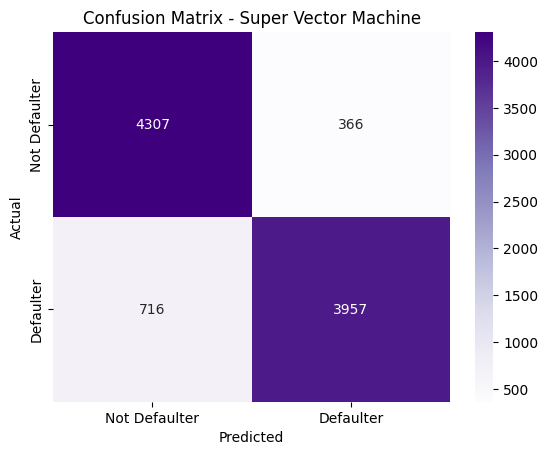

In [ ]:

import seaborn as sns
import matplotlib.pyplot as plt

labels = ['Not Defaulter', 'Defaulter']

# Vẽ confusion matrix bằng seaborn
heatmap = sns.heatmap(test_cm_svm_grid, annot=True,fmt='d', cmap='Purples')
heatmap.xaxis.set_ticklabels(labels)
heatmap.yaxis.set_ticklabels(labels)

# Thiết lập tên các trục và tiêu đề
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - Super Vector Machine')

# Hiển thị đồ thị
plt.show()


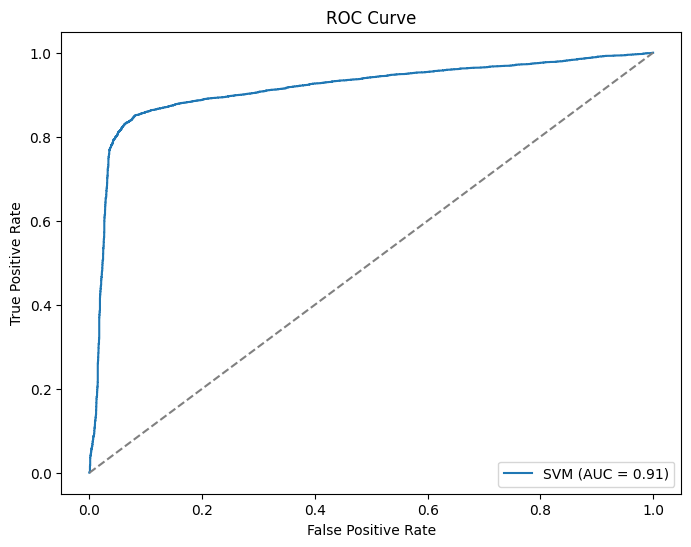

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, roc_auc_score

def plot_auc_roc_curve(y_train_pred_prob_model_grid):
    plt.figure(figsize=(8, 6))

    y_pred_proba = y_train_pred_prob_model_grid
    fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
    roc_auc = roc_auc_score(y_test, y_pred_proba)

    plt.plot(fpr, tpr, label=f'{"SVM"} (AUC = {roc_auc:.2f})')

    plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve')
    plt.legend(loc='lower right')
    # plt.text(0.8, 0.2, f'AUC = {roc_auc:.2f}', fontsize=12, ha='center')
    plt.show()

plot_auc_roc_curve(y_train_pred_prob_svm_grid)

## **Random Forest Classifer**

In [ ]:
# Number of trees
n_estimators = [100,150,200]

# Maximum depth of trees
max_depth = [10,20,30]

# Minimum number of samples required to split a node
min_samples_split = [50,100,150]

# Minimum number of samples required at each leaf node
min_samples_leaf = [40,50]

# Hyperparameter Grid
param_dict = {'n_estimators' : n_estimators,
              'max_depth' : max_depth,
              'min_samples_split' : min_samples_split,
              'min_samples_leaf' : min_samples_leaf}

In [ ]:
# Create an instance of the RandomForestClassifier
rfc = RandomForestClassifier()

# Grid search
rfc_grid = GridSearchCV(estimator=rfc,
                       param_grid = param_dict,
                       cv = 5, verbose=2, scoring='roc_auc')
# fitting model
rfc_grid.fit(X_train,y_train)

Fitting 5 folds for each of 54 candidates, totalling 270 fits
[CV] END max_depth=10, min_samples_leaf=40, min_samples_split=50, n_estimators=100; total time=   5.0s
[CV] END max_depth=10, min_samples_leaf=40, min_samples_split=50, n_estimators=100; total time=   4.7s
[CV] END max_depth=10, min_samples_leaf=40, min_samples_split=50, n_estimators=100; total time=   5.6s
[CV] END max_depth=10, min_samples_leaf=40, min_samples_split=50, n_estimators=100; total time=   4.6s
[CV] END max_depth=10, min_samples_leaf=40, min_samples_split=50, n_estimators=100; total time=   4.7s
[CV] END max_depth=10, min_samples_leaf=40, min_samples_split=50, n_estimators=150; total time=   7.5s
[CV] END max_depth=10, min_samples_leaf=40, min_samples_split=50, n_estimators=150; total time=   7.5s
[CV] END max_depth=10, min_samples_leaf=40, min_samples_split=50, n_estimators=150; total time=   7.1s
[CV] END max_depth=10, min_samples_leaf=40, min_samples_split=50, n_estimators=150; total time=   7.5s
[CV] END ma

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'max_depth': [10, 20, 30],
                         'min_samples_leaf': [40, 50],
                         'min_samples_split': [50, 100, 150],
                         'n_estimators': [100, 150, 200]},
             scoring='roc_auc', verbose=2)

In [ ]:
rfc_grid.best_estimator_

RandomForestClassifier(max_depth=20, min_samples_leaf=40, min_samples_split=50,
                       n_estimators=200)

In [ ]:
rfc_grid.best_params_

{'max_depth': 20,
 'min_samples_leaf': 40,
 'min_samples_split': 50,
 'n_estimators': 200}

In [ ]:
rfc_optimal_model = rfc_grid.best_estimator_

In [ ]:
#class prediction of y on train and test
y_pred_rfc_grid=rfc_optimal_model.predict(X_test)
y_train_pred_rfc_grid=rfc_optimal_model.predict(X_train)

# Get the probabilities on train and test
y_pred_prob_rfc_grid = rfc_optimal_model.predict_proba(X_train)[:,1]
y_train_pred_prob_rfc_grid = rfc_optimal_model.predict_proba(X_test)[:,1]

In [ ]:
# #getting all scores for Random Forest Classifier after CV and Hyperparameter Tunning
# train_accuracy_rfc_grid = round(accuracy_score(y_train_pred_rfc_grid,y_train), 3)
# accuracy_rfc_grid = round(accuracy_score(y_pred_rfc_grid,y_test), 3)
# precision_score_rfc_grid = round(precision_score(y_pred_rfc_grid,y_test), 3)
# recall_score_rfc_grid = round(recall_score(y_pred_rfc_grid,y_test), 3)
# f1_score_rfc_grid = round(f1_score(y_pred_rfc_grid,y_test), 3)
# auc_rfc_grid = round(roc_auc_score(y_pred_rfc_grid,y_test), 3)

# print("The accuracy on train data is ", train_accuracy_rfc_grid)
# print("The accuracy on test data is ", accuracy_rfc_grid)
# print("The precision on test data is ", precision_score_rfc_grid)
# print("The recall on test data is ", recall_score_rfc_grid)
# print("The f1 on test data is ", f1_score_rfc_grid)
# print("The auc on test data is ", auc_rfc_grid)

The accuracy on train data is  0.882
The accuracy on test data is  0.884
The precision on test data is  0.843
The recall on test data is  0.918
The f1 on test data is  0.879
The auc on test data is  0.886


In [ ]:
# Get the confusion matrices for train and test
train_cm_rfc_grid = confusion_matrix(y_train,y_train_pred_rfc_grid)
test_cm_rfc_grid = confusion_matrix(y_test,y_pred_rfc_grid )

### plot

In [ ]:
from tabulate import tabulate
from sklearn.metrics import classification_report, accuracy_score


train_accuracy_rfc_grid = round(accuracy_score(y_train_pred_rfc_grid,y_train), 3)
accuracy_rfc_grid = round(accuracy_score(y_pred_rfc_grid,y_test), 3)
precision_score_rfc_grid = round(precision_score(y_pred_rfc_grid, y_test), 3)
recall_score_rfc_grid = round(recall_score(y_pred_rfc_grid,y_test), 3)
f1_score_rfc_grid = round(f1_score(y_pred_rfc_grid,y_test), 3)
auc_rfc_grid = round(roc_auc_score(y_test, y_train_pred_prob_rfc_grid), 3)

# Create a table with the evaluation metrics
table_data = [
    ["Metric", "Accuracy", "Precision", "Recall", "F1-Score"],
    ["Train", train_accuracy_rfc_grid, "", "", ""],
    ["Test", accuracy_rfc_grid, precision_score_rfc_grid, recall_score_rfc_grid, f1_score_rfc_grid]
]
# table_data = [
#     ["Metric", "Train", "Test"],
#     ["Accuracy", train_accuracy_rfc_grid, accuracy_rfc_grid],
#     ["Precision","" ,precision_score_rfc_grid],
#     ["Recall","", recall_score_rfc_grid],
#     ["F1-Score","" ,f1_score_rfc_grid],
#     ["AUC", "", auc_rfc_grid]
# ]

table = tabulate(table_data, headers="firstrow", tablefmt="fancy_grid")

# Print the table
print(table)


╒═══════════╤═════════╤════════╕
│ Metric    │ Train   │   Test │
╞═══════════╪═════════╪════════╡
│ Accuracy  │ 0.883   │  0.882 │
├───────────┼─────────┼────────┤
│ Precision │         │  0.845 │
├───────────┼─────────┼────────┤
│ Recall    │         │  0.912 │
├───────────┼─────────┼────────┤
│ F1-Score  │         │  0.878 │
├───────────┼─────────┼────────┤
│ AUC       │         │  0.935 │
╘═══════════╧═════════╧════════╛


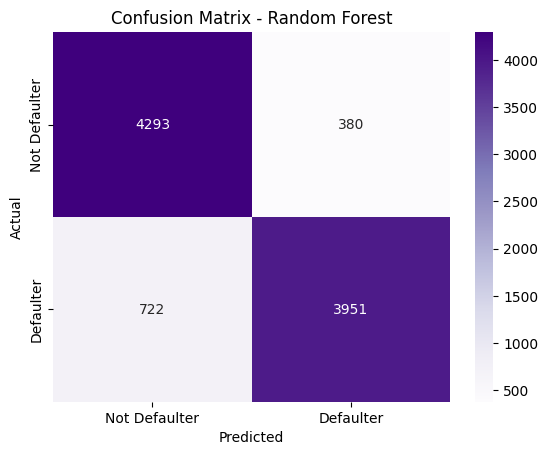

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

labels = ['Not Defaulter', 'Defaulter']

# Vẽ confusion matrix bằng seaborn
heatmap = sns.heatmap(test_cm_rfc_grid, annot=True,fmt='d', cmap='Purples')
heatmap.xaxis.set_ticklabels(labels)
heatmap.yaxis.set_ticklabels(labels)

# Thiết lập tên các trục và tiêu đề
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - Random Forest')

# Hiển thị đồ thị
plt.show()


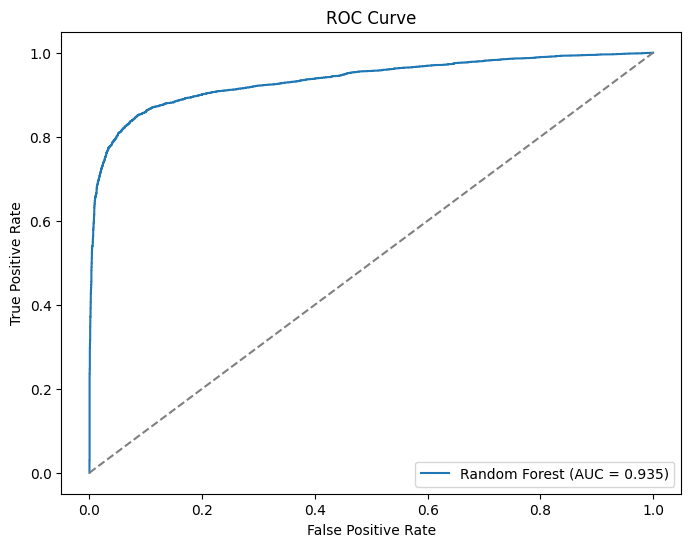

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, roc_auc_score

def plot_auc_roc_curve(y_train_pred_prob_model_grid):
    plt.figure(figsize=(8, 6))

    y_pred_proba = y_train_pred_prob_model_grid
    fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
    roc_auc = roc_auc_score(y_test, y_pred_proba)

    plt.plot(fpr, tpr, label=f'{"Random Forest"} (AUC = {roc_auc:.3f})')

    plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve')
    plt.legend(loc='lower right')
    # plt.text(0.8, 0.2, f'AUC = {roc_auc:.2f}', fontsize=12, ha='center')
    plt.show()

plot_auc_roc_curve(y_train_pred_prob_rfc_grid)

## **Gradient Boosting**

In [ ]:
# to shrinks the contribution of each tree by learning_rate
learning_rates = [1, 0.5, 0.25, 0.1, 0.05, 0.01]

# Number of trees
n_estimators = [100,150,200]

# Maximum depth of trees
max_depth = [10,20,30]

# Minimum number of samples required to split a node
min_samples_split = [50,100,150]

# Minimum number of samples required at each leaf node
min_samples_leaf = [40,50]

# Hyperparameter Grid
param_dict = {'learning_rate': learning_rates,
              'n_estimators' : n_estimators,
              'max_depth' : max_depth,
              'min_samples_split' : min_samples_split,
              'min_samples_leaf' : min_samples_leaf}

In [ ]:
# Create an instance of the RandomForestClassifier
gbc = GradientBoostingClassifier(random_state=42)

# Grid search
gbc_grid = RandomizedSearchCV(estimator=gbc,
                       param_distributions = param_dict,
                       cv = 2, verbose=2, scoring='roc_auc')
# fitting model
gbc_grid.fit(X_train,y_train)

Fitting 2 folds for each of 10 candidates, totalling 20 fits
[CV] END learning_rate=0.01, max_depth=10, min_samples_leaf=50, min_samples_split=150, n_estimators=200; total time=  43.3s
[CV] END learning_rate=0.01, max_depth=10, min_samples_leaf=50, min_samples_split=150, n_estimators=200; total time=  42.0s
[CV] END learning_rate=0.25, max_depth=20, min_samples_leaf=40, min_samples_split=50, n_estimators=200; total time= 1.4min
[CV] END learning_rate=0.25, max_depth=20, min_samples_leaf=40, min_samples_split=50, n_estimators=200; total time= 1.4min
[CV] END learning_rate=0.01, max_depth=30, min_samples_leaf=40, min_samples_split=100, n_estimators=100; total time=  29.1s
[CV] END learning_rate=0.01, max_depth=30, min_samples_leaf=40, min_samples_split=100, n_estimators=100; total time=  29.9s
[CV] END learning_rate=1, max_depth=30, min_samples_leaf=40, min_samples_split=100, n_estimators=150; total time= 1.5min
[CV] END learning_rate=1, max_depth=30, min_samples_leaf=40, min_samples_spl

RandomizedSearchCV(cv=2, estimator=GradientBoostingClassifier(random_state=42),
                   param_distributions={'learning_rate': [1, 0.5, 0.25, 0.1,
                                                          0.05, 0.01],
                                        'max_depth': [10, 20, 30],
                                        'min_samples_leaf': [40, 50],
                                        'min_samples_split': [50, 100, 150],
                                        'n_estimators': [100, 150, 200]},
                   scoring='roc_auc', verbose=2)

In [ ]:
gbc_grid.best_estimator_

GradientBoostingClassifier(learning_rate=0.01, max_depth=10,
                           min_samples_leaf=50, min_samples_split=150,
                           n_estimators=200, random_state=42)

In [ ]:
gbc_grid.best_params_

{'n_estimators': 200,
 'min_samples_split': 150,
 'min_samples_leaf': 50,
 'max_depth': 10,
 'learning_rate': 0.01}

In [ ]:
gbc_optimal_model = gbc_grid.best_estimator_

In [ ]:
#class prediction of y on train and test
y_pred_gbc_grid=gbc_optimal_model.predict(X_test)
y_train_pred_gbc_grid=gbc_optimal_model.predict(X_train)

# Get the probabilities on train and test
y_pred_prob_gbc_grid = gbc_optimal_model.predict_proba(X_train)[:,1]
y_train_pred_prob_gbc_grid = gbc_optimal_model.predict_proba(X_test)[:,1]

In [ ]:
# #getting all scores for Gradient Boosting after CV and Hyperparameter Tunning
# train_accuracy_gbc_grid = round(accuracy_score(y_train_pred_gbc_grid,y_train), 3)
# accuracy_gbc_grid = round(accuracy_score(y_pred_gbc_grid,y_test), 3)
# precision_score_gbc_grid = round(precision_score(y_pred_gbc_grid,y_test), 3)
# recall_score_gbc_grid = round(recall_score(y_pred_gbc_grid,y_test), 3)
# f1_score_gbc_grid = round(f1_score(y_pred_gbc_grid,y_test), 3)
# auc_gbc_grid = round(roc_auc_score(y_pred_gbc_grid,y_test), 3)

# print("The accuracy on train data is ", train_accuracy_gbc_grid)
# print("The accuracy on test data is ", accuracy_gbc_grid)
# print("The precision on test data is ", precision_score_gbc_grid)
# print("The recall on test data is ", recall_score_gbc_grid)
# print("The f1 on test data is ", f1_score_gbc_grid)
# print("The auc on test data is ", auc_gbc_grid)

The accuracy on train data is  0.898
The accuracy on test data is  0.887
The precision on test data is  0.843
The recall on test data is  0.925
The f1 on test data is  0.882
The auc on test data is  0.89


In [ ]:
# Get the confusion matrices for train and test
train_cm_gbc_grid = confusion_matrix(y_train,y_train_pred_gbc_grid)
test_cm_gbc_grid = confusion_matrix(y_test,y_pred_gbc_grid )

### plot

In [ ]:
from tabulate import tabulate
from sklearn.metrics import classification_report, accuracy_score


train_accuracy_gbc_grid = round(accuracy_score(y_train_pred_gbc_grid,y_train), 3)
accuracy_gbc_grid = round(accuracy_score(y_pred_gbc_grid,y_test), 3)
precision_score_gbc_grid = round(precision_score(y_pred_gbc_grid, y_test), 3)
recall_score_gbc_grid = round(recall_score(y_pred_gbc_grid,y_test), 3)
f1_score_gbc_grid = round(f1_score(y_pred_gbc_grid,y_test), 3)
auc_gbc_grid = round(roc_auc_score(y_test, y_train_pred_prob_gbc_grid), 3)

# Create a table with the evaluation metrics
# Create a table with the evaluation metrics
table_data = [
    ["Metric", "Accuracy", "Precision", "Recall", "F1-Score"],
    ["Train", train_accuracy_gbc_grid, "", "", ""],
    ["Test", accuracy_gbc_grid, precision_score_gbc_grid, recall_score_gbc_grid, f1_score_gbc_grid]
]

# table_data = [
#     ["Metric", "Train", "Test"],
#     ["Accuracy", train_accuracy_gbc_grid, accuracy_gbc_grid],
#     ["Precision","" ,precision_score_gbc_grid],
#     ["Recall","", recall_score_gbc_grid],
#     ["F1-Score","" ,f1_score_gbc_grid],
#     ["AUC", "", auc_gbc_grid]
# ]

table = tabulate(table_data, headers="firstrow", tablefmt="fancy_grid")

# Print the table
print(table)


╒══════════╤════════════╤═════════════╤══════════╤════════════╕
│ Metric   │   Accuracy │ Precision   │ Recall   │ F1-Score   │
╞══════════╪════════════╪═════════════╪══════════╪════════════╡
│ Train    │      0.889 │             │          │            │
├──────────┼────────────┼─────────────┼──────────┼────────────┤
│ Test     │      0.885 │ 0.845       │ 0.919    │ 0.88       │
╘══════════╧════════════╧═════════════╧══════════╧════════════╛


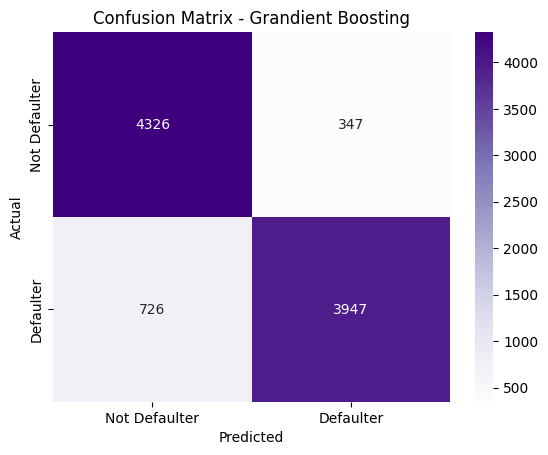

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

labels = ['Not Defaulter', 'Defaulter']

# Vẽ confusion matrix bằng seaborn
heatmap = sns.heatmap(test_cm_gbc_grid, annot=True,fmt='d', cmap='Purples')
heatmap.xaxis.set_ticklabels(labels)
heatmap.yaxis.set_ticklabels(labels)

# Thiết lập tên các trục và tiêu đề
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - Grandient Boosting')

# Hiển thị đồ thị
plt.show()


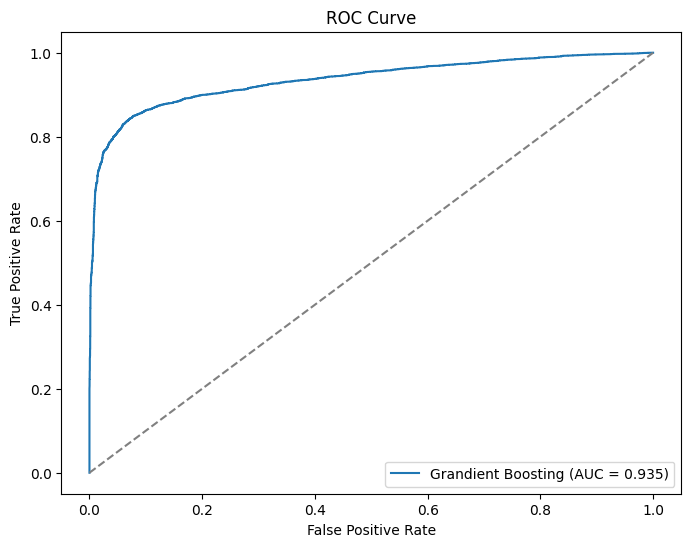

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, roc_auc_score

def plot_auc_roc_curve(y_train_pred_prob_model_grid):
    plt.figure(figsize=(8, 6))

    y_pred_proba = y_train_pred_prob_model_grid
    fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
    roc_auc = roc_auc_score(y_test, y_pred_proba)

    plt.plot(fpr, tpr, label=f'{"Grandient Boosting"} (AUC = {roc_auc:.3f})')

    plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve')
    plt.legend(loc='lower right')
    # plt.text(0.8, 0.2, f'AUC = {roc_auc:.2f}', fontsize=12, ha='center')
    plt.show()

plot_auc_roc_curve(y_train_pred_prob_gbc_grid)

## **XG Boosting**

In [ ]:
from sklearn.model_selection import RandomizedSearchCV

In [ ]:
# Hyperparameter Grid
param_dict = {'learning_rate': [0.15, 0.1, 0.05],
              'n_estimators' : [200, 250],
              'max_depth' : [15,20,25],
              'min_child_weight' : [1,3],
              'gamma': [0.3, 0.2, 0.1],
              'min_samples_leaf' : [40, 50]}

In [ ]:
# Create an instance of the XGBClassifier
xgb = XGBClassifier()

# Grid search
xgb_grid = RandomizedSearchCV(estimator=xgb,
                       param_distributions = param_dict,
                       n_jobs=-1, n_iter=5, cv = 3,
                       verbose=2, scoring='roc_auc')
# fitting model
xgb_grid.fit(X_train,y_train)

Fitting 3 folds for each of 5 candidates, totalling 15 fits
[05:36:10] WARNING: ../src/learner.cc:767: 
Parameters: { "min_samples_leaf" } are not used.



RandomizedSearchCV(cv=3,
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           callbacks=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None,
                                           early_stopping_rounds=None,
                                           enable_categorical=False,
                                           eval_metric=None, feature_types=None,
                                           gamma=None, gpu_id=None,
                                           grow_policy=None,
                                           importance_type=None,
                                           interaction_constraints=None,
                                           learning_rate...
                                           min_child_weight=None, missing=nan,
                                           monotone_constraints=None,
                                           n_estimators=100, n_jobs=None,
                                           num_parallel_tree=None,
                                           predictor=None, random_state=None, ...),
                   n_iter=5, n_jobs=-1,
                   param_distributions={'gamma': [0.3, 0.2, 0.1],
                                        'learning_rate': [0.15, 0.1, 0.05],
                                        'max_depth': [15, 20, 25],
                                        'min_child_weight': [1, 3],
                                        'min_samples_leaf': [40, 50],
                                        'n_estimators': [200, 250]},
                   scoring='roc_auc', verbose=2)

In [ ]:
xgb_grid.best_estimator_

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=0.2, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=20, max_leaves=None,
              min_child_weight=1, min_samples_leaf=50, missing=nan,
              monotone_constraints=None, n_estimators=250, n_jobs=None,
              num_parallel_tree=None, predictor=None, ...)

In [ ]:
xgb_grid.best_params_

{'n_estimators': 250,
 'min_samples_leaf': 50,
 'min_child_weight': 1,
 'max_depth': 20,
 'learning_rate': 0.1,
 'gamma': 0.2}

In [ ]:
xgb_optimal_model = xgb_grid.best_estimator_

In [ ]:
#class prediction of y on train and test
y_pred_xgb_grid=xgb_optimal_model.predict(X_test)
y_train_pred_xgb_grid=xgb_optimal_model.predict(X_train)

# Get the probabilities on train and test
y_pred_prob_xgb_grid = xgb_optimal_model.predict_proba(X_train)[:,1]
y_train_pred_prob_xgb_grid = xgb_optimal_model.predict_proba(X_test)[:,1]

In [ ]:
# #getting all scores for XG Boosting after CV and Hyperparameter Tunning
# train_accuracy_xgb_grid = round(accuracy_score(y_train_pred_xgb_grid,y_train), 3)
# accuracy_xgb_grid = round(accuracy_score(y_pred_xgb_grid,y_test), 3)
# precision_score_xgb_grid = round(precision_score(y_pred_xgb_grid,y_test), 3)
# recall_score_xgb_grid = round(recall_score(y_pred_xgb_grid,y_test), 3)
# f1_score_xgb_grid = round(f1_score(y_pred_xgb_grid,y_test), 3)
# auc_xgb_grid = round(roc_auc_score(y_test, y_train_pred_prob_xgb_grid), 3)

# print("The accuracy on train data is ", train_accuracy_xgb_grid)
# print("The accuracy on test data is ", accuracy_xgb_grid)
# print("The precision on test data is ", precision_score_xgb_grid)
# print("The recall on test data is ", recall_score_xgb_grid)
# print("The f1 on test data is ", f1_score_xgb_grid)
# print("The auc on test data is ", auc_xgb_grid)

The accuracy on train data is  0.996
The accuracy on test data is  0.885
The precision on test data is  0.844
The recall on test data is  0.92
The f1 on test data is  0.88
The auc on test data is  0.935


In [ ]:
# Get the confusion matrices for train and test
train_cm_xgb_grid = confusion_matrix(y_train,y_train_pred_xgb_grid)
test_cm_xgb_grid = confusion_matrix(y_test,y_pred_xgb_grid )

### plot

In [ ]:
from tabulate import tabulate
from sklearn.metrics import classification_report, accuracy_score


train_accuracy_xgb_grid = round(accuracy_score(y_train_pred_xgb_grid,y_train), 3)
accuracy_xgb_grid = round(accuracy_score(y_pred_xgb_grid,y_test), 3)
precision_score_xgb_grid = round(precision_score(y_pred_xgb_grid, y_test), 3)
recall_score_xgb_grid = round(recall_score(y_pred_xgb_grid,y_test), 3)
f1_score_xgb_grid = round(f1_score(y_pred_xgb_grid,y_test), 3)
auc_xgb_grid = round(roc_auc_score(y_test, y_train_pred_prob_xgb_grid), 3)

# Create a table with the evaluation metrics
table_data = [
    ["Metric", "Accuracy", "Precision", "Recall", "F1-Score"],
    ["Train", train_accuracy_xgb_grid, "", "", ""],
    ["Test", accuracy_xgb_grid, precision_score_xgb_grid, recall_score_xgb_grid, f1_score_xgb_grid]
]

# table_data = [
#     ["Metric", "Train", "Test"],
#     ["Accuracy", train_accuracy_xgb_grid, accuracy_xgb_grid],
#     ["Precision","" ,precision_score_xgb_grid],
#     ["Recall","", recall_score_xgb_grid],
#     ["F1-Score","" ,f1_score_xgb_grid],
#     ["AUC", "", auc_xgb_grid]
# ]

table = tabulate(table_data, headers="firstrow", tablefmt="fancy_grid")

# Print the table
print(table)


╒══════════╤════════════╤═════════════╤══════════╤════════════╕
│ Metric   │   Accuracy │ Precision   │ Recall   │ F1-Score   │
╞══════════╪════════════╪═════════════╪══════════╪════════════╡
│ Train    │      0.997 │             │          │            │
├──────────┼────────────┼─────────────┼──────────┼────────────┤
│ Test     │      0.882 │ 0.842       │ 0.915    │ 0.877      │
╘══════════╧════════════╧═════════════╧══════════╧════════════╛


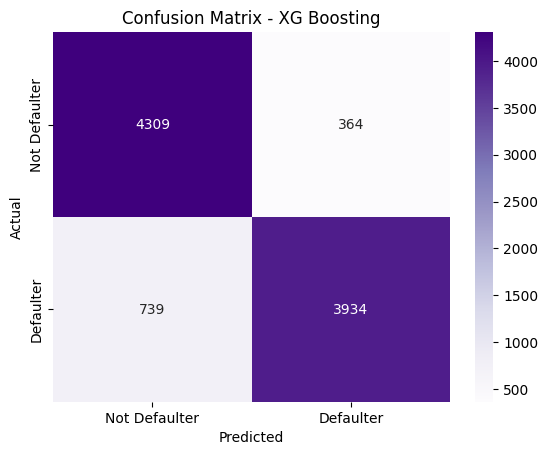

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

labels = ['Not Defaulter', 'Defaulter']

# Vẽ confusion matrix bằng seaborn
heatmap = sns.heatmap(test_cm_xgb_grid, annot=True,fmt='d', cmap='Purples')
heatmap.xaxis.set_ticklabels(labels)
heatmap.yaxis.set_ticklabels(labels)

# Thiết lập tên các trục và tiêu đề
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - XG Boosting')

# Hiển thị đồ thị
plt.show()


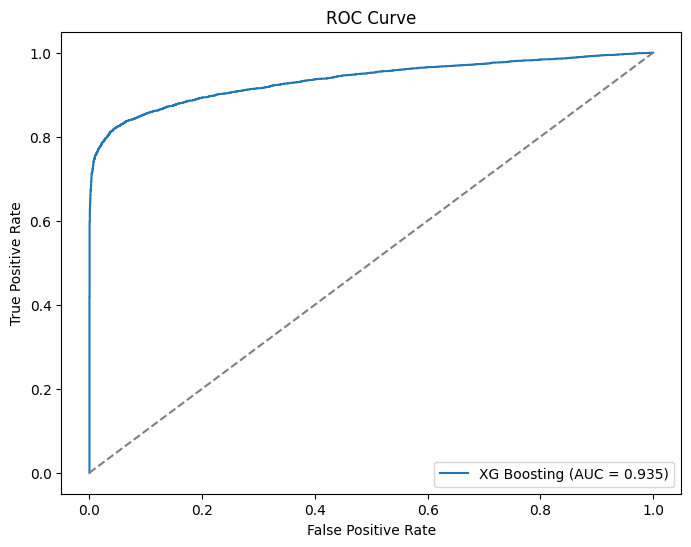

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, roc_auc_score

def plot_auc_roc_curve(y_train_pred_prob_model_grid):
    plt.figure(figsize=(8, 6))

    y_pred_proba = y_train_pred_prob_model_grid
    fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
    roc_auc = roc_auc_score(y_test, y_pred_proba)

    plt.plot(fpr, tpr, label=f'{"XG Boosting"} (AUC = {roc_auc:.3f})')

    plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve')
    plt.legend(loc='lower right')
    # plt.text(0.8, 0.2, f'AUC = {roc_auc:.2f}', fontsize=12, ha='center')
    plt.show()

plot_auc_roc_curve(y_train_pred_prob_xgb_grid)



## **LightGBM**

In [ ]:
from sklearn.model_selection import RandomizedSearchCV

In [ ]:
# Hyperparameter Grid
param_dict_lgb = {'learning_rate': [0.15, 0.1, 0.05],
              'n_estimators' : [200, 250],
              'max_depth' : [15,20,25],
              'min_child_weight' : [1,3],
              'gamma': [0.3, 0.2, 0.1],
              'num_leaves': [31, 50],
              'min_samples_leaf' : [40, 50]}



In [ ]:
# Create an instance of the XGBClassifier
import lightgbm as lgb
lgb = lgb.LGBMClassifier()

# Grid search
lgb_grid = RandomizedSearchCV(estimator=lgb,
                       param_distributions = param_dict_lgb,
                       n_jobs=-1, n_iter=5, cv = 3,
                       verbose=2, scoring='roc_auc')
# fitting model
lgb_grid.fit(X_train,y_train)

Fitting 3 folds for each of 5 candidates, totalling 15 fits
[LightGBM] [Warning] Unknown parameter: gamma
[LightGBM] [Warning] min_data_in_leaf is set with min_samples_leaf=40, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=40


RandomizedSearchCV(cv=3, estimator=LGBMClassifier(), n_iter=5, n_jobs=-1,
                   param_distributions={'gamma': [0.3, 0.2, 0.1],
                                        'learning_rate': [0.15, 0.1, 0.05],
                                        'max_depth': [15, 20, 25],
                                        'min_child_weight': [1, 3],
                                        'min_samples_leaf': [40, 50],
                                        'n_estimators': [200, 250],
                                        'num_leaves': [31, 50]},
                   scoring='roc_auc', verbose=2)

In [ ]:
lgb_grid.best_estimator_

LGBMClassifier(gamma=0.3, max_depth=25, min_child_weight=3, min_samples_leaf=40,
               n_estimators=250)

In [ ]:
lgb_grid.best_params_

{'num_leaves': 31,
 'n_estimators': 250,
 'min_samples_leaf': 40,
 'min_child_weight': 3,
 'max_depth': 25,
 'learning_rate': 0.1,
 'gamma': 0.3}

In [ ]:
lgb_optimal_model = lgb_grid.best_estimator_

In [ ]:
#class prediction of y on train and test
y_pred_lgb_grid=lgb_optimal_model.predict(X_test)
y_train_pred_lgb_grid=lgb_optimal_model.predict(X_train)

# Get the probabilities on train and test
y_pred_prob_lgb_grid = lgb_optimal_model.predict_proba(X_train)[:,1]
y_train_pred_prob_lgb_grid = lgb_optimal_model.predict_proba(X_test)[:,1]

In [ ]:
#getting all scores for XG Boosting after CV and Hyperparameter Tunning
# train_accuracy_lgb_grid = round(accuracy_score(y_train_pred_lgb_grid,y_train), 3)
# accuracy_lgb_grid = round(accuracy_score(y_pred_lgb_grid,y_test), 3)
# precision_score_lgb_grid = round(precision_score(y_pred_lgb_grid,y_test), 3)
# recall_score_lgb_grid = round(recall_score(y_pred_lgb_grid,y_test), 3)
# f1_score_lgb_grid = round(f1_score(y_pred_lgb_grid,y_test), 3)
# auc_lgb_grid = round(roc_auc_score(y_test, y_train_pred_prob_lgb_grid), 3)

# print("The accuracy on train data is ", train_accuracy_lgb_grid)
# print("The accuracy on test data is ", accuracy_lgb_grid)
# print("The precision on test data is ", precision_score_lgb_grid)
# print("The recall on test data is ", recall_score_lgb_grid)
# print("The f1 on test data is ", f1_score_lgb_grid)
# print("The auc on test data is ", auc_lgb_grid)

The accuracy on train data is  0.893
The accuracy on test data is  0.887
The precision on test data is  0.841
The recall on test data is  0.926
The f1 on test data is  0.882
The auc on test data is  0.937


In [ ]:
# Get the confusion matrices for train and test
train_cm_lgb_grid = confusion_matrix(y_train,y_train_pred_lgb_grid)
test_cm_lgb_grid = confusion_matrix(y_test,y_pred_lgb_grid )
# train_cm_xgb_grid

### plot

In [ ]:
from tabulate import tabulate
from sklearn.metrics import classification_report, accuracy_score


train_accuracy_lgb_grid = round(accuracy_score(y_train_pred_lgb_grid,y_train), 3)
accuracy_lgb_grid = round(accuracy_score(y_pred_lgb_grid,y_test), 3)
precision_score_lgb_grid = round(precision_score(y_pred_lgb_grid,y_test), 3)
recall_score_lgb_grid = round(recall_score(y_pred_lgb_grid,y_test), 3)
f1_score_lgb_grid = round(f1_score(y_pred_lgb_grid,y_test), 3)
auc_lgb_grid = round(roc_auc_score(y_test, y_train_pred_prob_lgb_grid), 3)

# Create a table with the evaluation metrics
table_data = [
    ["Metric", "Accuracy", "Precision", "Recall", "F1-Score"],
    ["Train", train_accuracy_lgb_grid, "", "", ""],
    ["Test", accuracy_lgb_grid, precision_score_lgb_grid, recall_score_lgb_grid, f1_score_lgb_grid]
]
# table_data = [
#     ["Metric", "Train", "Test"],
#     ["Accuracy", train_accuracy_logi_grid, accuracy_logi_grid],
#     ["Precision","" ,precision_score_logi_grid],
#     ["Recall","", recall_score_logi_grid],
#     ["F1-Score","" ,f1_score_logi_grid]
#     # ,["AUC", "", auc_logi_grid]
# ]

table = tabulate(table_data, headers="firstrow", tablefmt="fancy_grid")

# Print the table
print(table)


╒══════════╤════════════╤═════════════╤══════════╤════════════╕
│ Metric   │   Accuracy │ Precision   │ Recall   │ F1-Score   │
╞══════════╪════════════╪═════════════╪══════════╪════════════╡
│ Train    │      0.91  │             │          │            │
├──────────┼────────────┼─────────────┼──────────┼────────────┤
│ Test     │      0.885 │ 0.838       │ 0.925    │ 0.879      │
╘══════════╧════════════╧═════════════╧══════════╧════════════╛


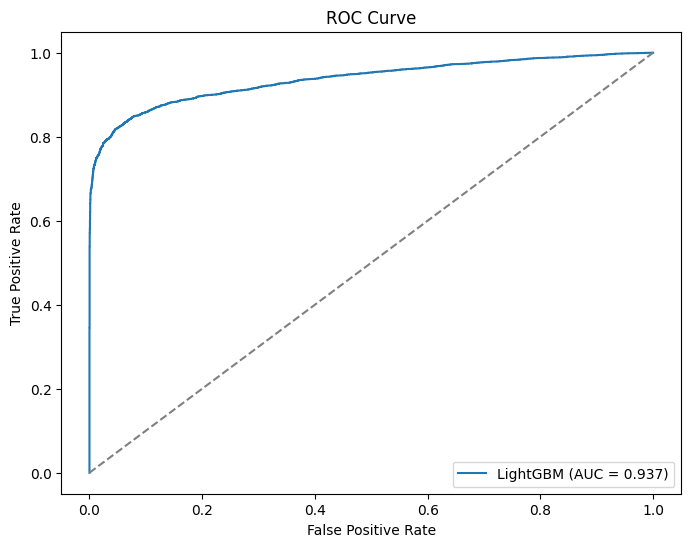

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, roc_auc_score

def plot_auc_roc_curve(y_train_pred_prob_model_grid):
    plt.figure(figsize=(8, 6))

    y_pred_proba = y_train_pred_prob_model_grid
    fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
    roc_auc = roc_auc_score(y_test, y_pred_proba)

    plt.plot(fpr, tpr, label=f'{"LightGBM"} (AUC = {roc_auc:.3f})')

    plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve')
    plt.legend(loc='lower right')
    # plt.text(0.8, 0.2, f'AUC = {roc_auc:.2f}', fontsize=12, ha='center')
    plt.show()

plot_auc_roc_curve(y_train_pred_prob_lgb_grid)



# **Final Model Comparision**

In [ ]:
grid_classifiers = ['Optimal Logistic Regression', 'Optimal Decision Tree', 'Optimal Random Forest', 'Optimal SVM', 'Optimal Gradient Boosting', 'Optimal XG Boosting']
grid_train_accuracy = [train_accuracy_logi_grid, train_accuracy_dtc_grid, train_accuracy_rfc_grid, train_accuracy_svm_grid, train_accuracy_gbc_grid, train_accuracy_xgb_grid]
grid_test_accuracy = [accuracy_logi_grid, accuracy_dtc_grid, accuracy_rfc_grid, accuracy_svm_grid, accuracy_gbc_grid, accuracy_xgb_grid]
grid_precision_score = [precision_score_logi_grid, precision_score_dtc_grid, precision_score_rfc_grid, precision_score_svm_grid, precision_score_gbc_grid, precision_score_xgb_grid]
grid_recall_score = [recall_score_logi_grid, recall_score_dtc_grid, recall_score_rfc_grid, recall_score_svm_grid, recall_score_gbc_grid, recall_score_xgb_grid]
grid_f1_score = [f1_score_logi_grid, f1_score_dtc_grid, f1_score_rfc_grid, f1_score_svm_grid, f1_score_gbc_grid, f1_score_xgb_grid]
grid_auc_score = [auc_logi_grid, auc_dtc_grid, auc_rfc_grid, auc_svm_grid, auc_gbc_grid, auc_xgb_grid]

In [ ]:
grid_compare_df = pd.DataFrame({'Classifier':grid_classifiers, 'Train Accuracy': grid_train_accuracy, 'Test Accuracy': grid_test_accuracy, 'Precision': grid_precision_score, 'Recall': grid_recall_score, 'F1 Score': grid_f1_score , 'AUC': grid_auc_score})

In [ ]:
all_comparision_df = pd.concat([compare_df, grid_compare_df]).reset_index()

In [ ]:
all_comparision_df.drop('index', axis=1, inplace=True)

In [ ]:
all_comparision_df.sort_values('AUC', axis=0, ascending=False, inplace=True)

In [ ]:
all_comparision_df

,Classifier,Train Accuracy,Test Accuracy,Precision,Recall,F1 Score,AUC
10,Optimal Gradient Boosting,0.898,0.887,0.843,0.925,0.882,0.936
11,Optimal XG Boosting,0.996,0.885,0.844,0.920,0.880,0.935
5,XG Boosting,0.916,0.885,0.837,0.926,0.879,0.934
8,Optimal Random Forest,0.882,0.884,0.843,0.918,0.879,0.934
2,Random Forest,0.998,0.882,0.841,0.916,0.877,0.933
4,Gradient Boosting,0.883,0.885,0.847,0.916,0.880,0.933
7,Optimal Decision Tree,0.880,0.883,0.845,0.915,0.879,0.927
0,Logistic Regression,0.879,0.882,0.845,0.913,0.878,0.920
6,Optimal Logistic Regression,0.879,0.882,0.845,0.913,0.878,0.920
3,SVM,0.883,0.884,0.843,0.919,0.879,0.914
